<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK7_02%EC%BA%90%EA%B8%80%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ï∫êÍ∏Ä ÌÉÄÏù¥ÌÉÄÎãâ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

**Part 1: ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù (EDA)**

Í∞Å ÌäπÏßï(Feature)Ïùò Î∂ÑÏÑù

Ïó¨Îü¨ ÌäπÏßï Í∞ÑÏùò Í¥ÄÍ≥ÑÎÇò Ìå®ÌÑ¥ ÌÉêÏÉâ

**Part 2: ÌäπÏÑ± Í≥µÌïô Î∞è Îç∞Ïù¥ÌÑ∞ Ï†ïÏ†ú (Feature Engineering & Data Cleaning)**

ÏÉàÎ°úÏö¥ ÌäπÏßï Ï∂îÍ∞Ä

Î∂àÌïÑÏöîÌïú ÌäπÏßï Ï†úÍ±∞

Î™®Îç∏ÎßÅÏóê Ï†ÅÌï©Ìïú ÌòïÌÉúÎ°ú Î≥ÄÌôò

**Part 3: ÏòàÏ∏° Î™®Îç∏ÎßÅ (Predictive Modeling)**

Í∏∞Î≥∏ ÏïåÍ≥†Î¶¨Ï¶ò Ïã§Ìñâ

ÍµêÏ∞® Í≤ÄÏ¶ù (Cross Validation)

ÏïôÏÉÅÎ∏î Í∏∞Î≤ï (Ensembling)

Ï§ëÏöîÌïú ÌäπÏßï Ï∂îÏ∂ú (Feature Importance Extraction)

##Part1 Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/ESAA/assignment/titanic/train.csv')

In [ ]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### how many survived?

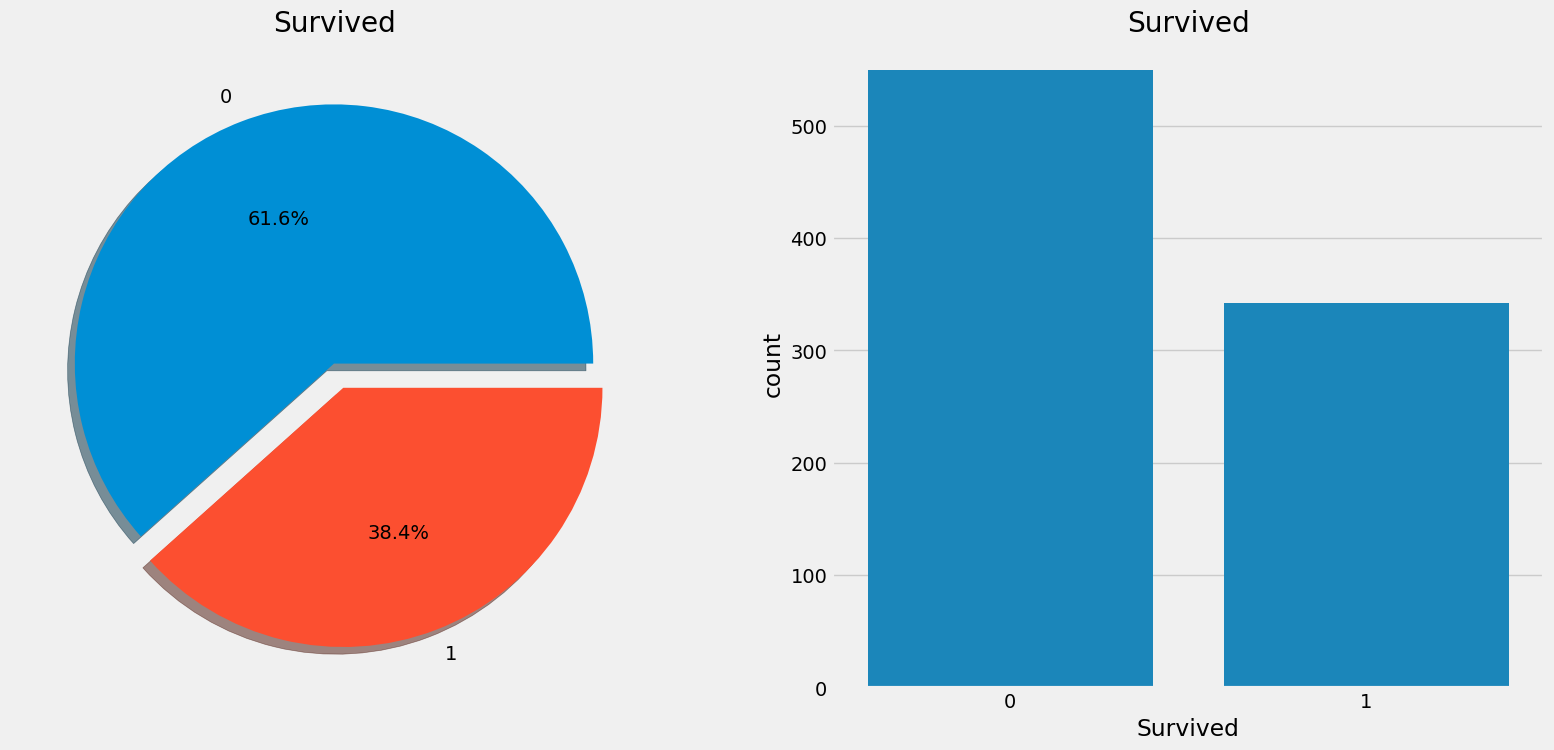

In [ ]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

1Ô∏è‚É£ Î≤îÏ£ºÌòï ÌäπÏßï (Categorical Features)

Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Îëê Í∞ú Ïù¥ÏÉÅÏùò Î≤îÏ£º(category) Î•º Í∞ÄÏßÄÎ©∞, Í∞Å Í∞íÏù¥ Í∑∏ Î≤îÏ£º Ï§ë ÌïòÎÇòÎ°ú Î∂ÑÎ•òÎê† Ïàò ÏûàÎäî Î≥ÄÏàòÏûÖÎãàÎã§.
ÏòàÎ•º Îì§Ïñ¥, ÏÑ±Î≥Ñ(gender) ÏùÄ ‚ÄúÎÇ®ÏÑ±(male)‚ÄùÍ≥º ‚ÄúÏó¨ÏÑ±(female)‚Äù Îëê Í∞ÄÏßÄ Î≤îÏ£ºÎ•º Í∞ÄÏßÄÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÏûÖÎãàÎã§.
Ïù¥Îü¨Ìïú Î≥ÄÏàòÎì§ÏùÄ Ï†ïÎ†¨Ïù¥ÎÇò ÏàúÏÑúÎ•º Îß§Í∏∏ Ïàò ÏóÜÏúºÎ©∞, Î™ÖÎ™©Ìòï Î≥ÄÏàò(Nominal Variables) ÎùºÍ≥†ÎèÑ Î∂ÄÎ¶ÖÎãàÎã§.  
Categorical Features in the dataset: Sex,Embarked

2Ô∏è‚É£ ÏÑúÏó¥Ìòï ÌäπÏßï (Ordinal Features)

ÏÑúÏó¥Ìòï Î≥ÄÏàòÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÏôÄ ÎπÑÏä∑ÌïòÏßÄÎßå, Í∞íÎì§ ÏÇ¨Ïù¥Ïóê ÏÉÅÎåÄÏ†ÅÏù∏ ÏàúÏÑúÎÇò ÌÅ¨Í∏∞ Í¥ÄÍ≥ÑÍ∞Ä Ï°¥Ïû¨ÌïúÎã§Îäî Ï†êÏù¥ Îã§Î¶ÖÎãàÎã§.
ÏòàÎ•º Îì§Ïñ¥, ÌÇ§(Height) Í∞Ä ‚ÄúTall(ÌÇ§ ÌÅº)‚Äù, ‚ÄúMedium(Î≥¥ÌÜµ)‚Äù, ‚ÄúShort(ÏûëÏùå)‚ÄùÏúºÎ°ú ÌëúÌòÑÎêúÎã§Î©¥, Ïù¥Îäî ÏÑúÏó¥Ìòï Î≥ÄÏàòÏûÖÎãàÎã§.
Ïù¥ Í≤ΩÏö∞, Í∞íÎì§ Í∞ÑÏóê ‚ÄòÏÉÅÎåÄÏ†ÅÏù∏ ÏàúÏÑú(Ï†ïÎ†¨)‚ÄôÍ∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.  
Ordinal Features in the dataset: PClass

3Ô∏è‚É£ Ïó∞ÏÜçÌòï ÌäπÏßï (Continuous Features)

Ïó∞ÏÜçÌòï Î≥ÄÏàòÎäî ÏµúÏÜåÍ∞íÍ≥º ÏµúÎåÄÍ∞í ÏÇ¨Ïù¥ÏóêÏÑú ÏûÑÏùòÏùò Í∞íÏùÑ Í∞ÄÏßà Ïàò ÏûàÎäî Î≥ÄÏàòÏûÖÎãàÎã§.
Ï¶â, Îëê Ï†ê ÏÇ¨Ïù¥Ïóê Î¨¥ÌïúÌûà ÎßéÏùÄ Í∞íÏù¥ Ï°¥Ïû¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.  
Continous Features in the dataset: Age

###Analysing The Features

Sex--> Categorical Feature

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

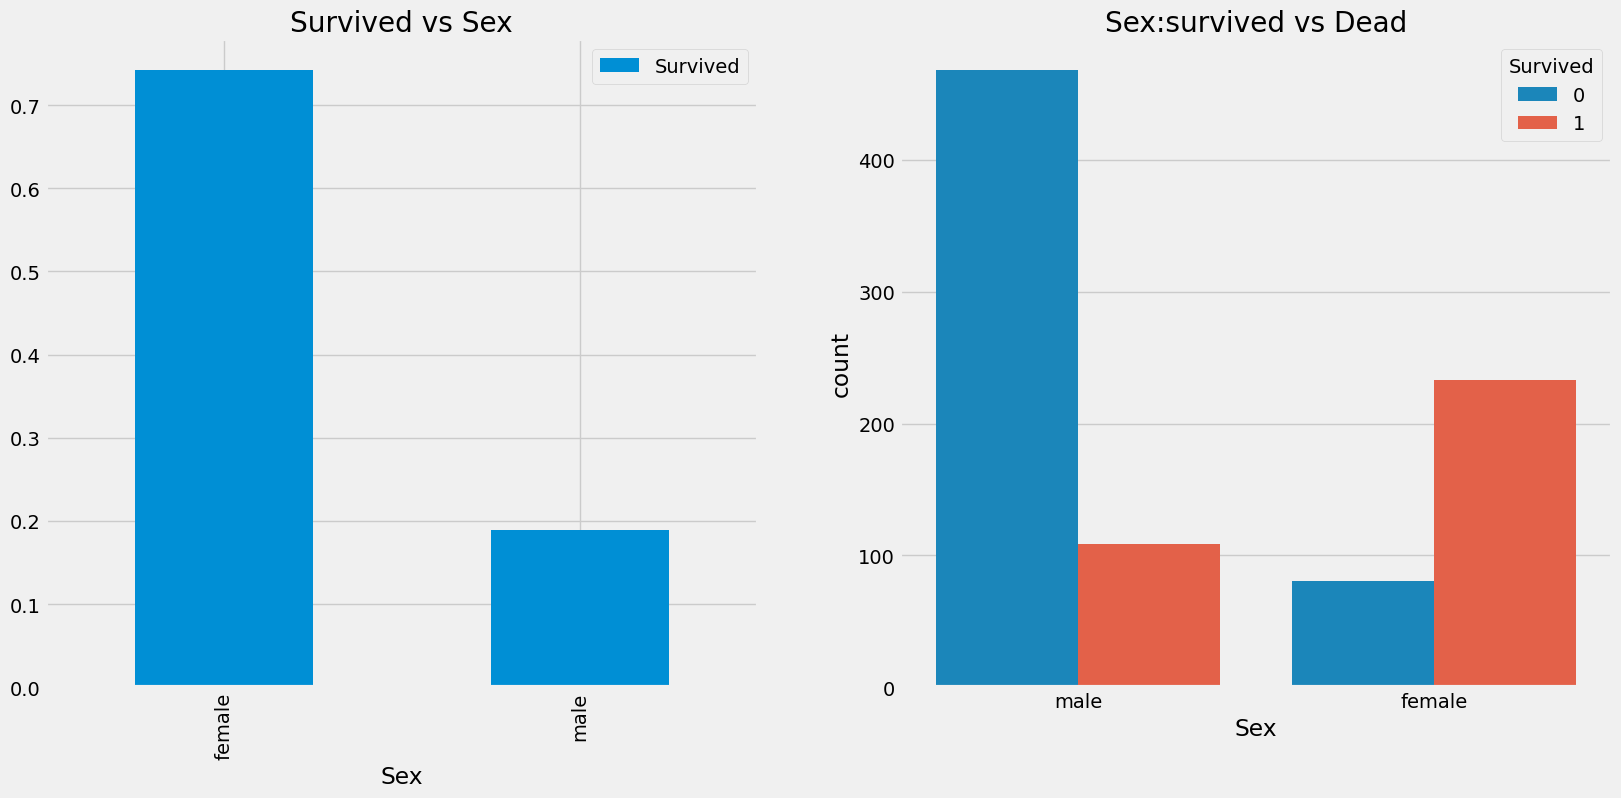

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:survived vs Dead')
plt.show()

Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥ÌôïÎ•†Ïù¥ Îß§Ïö∞ ÎÜíÏúºÎØÄÎ°ú Ï§ëÏöîÌïú ÌîºÏ≤ò

###Pclass-->Ordinal Feature

In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

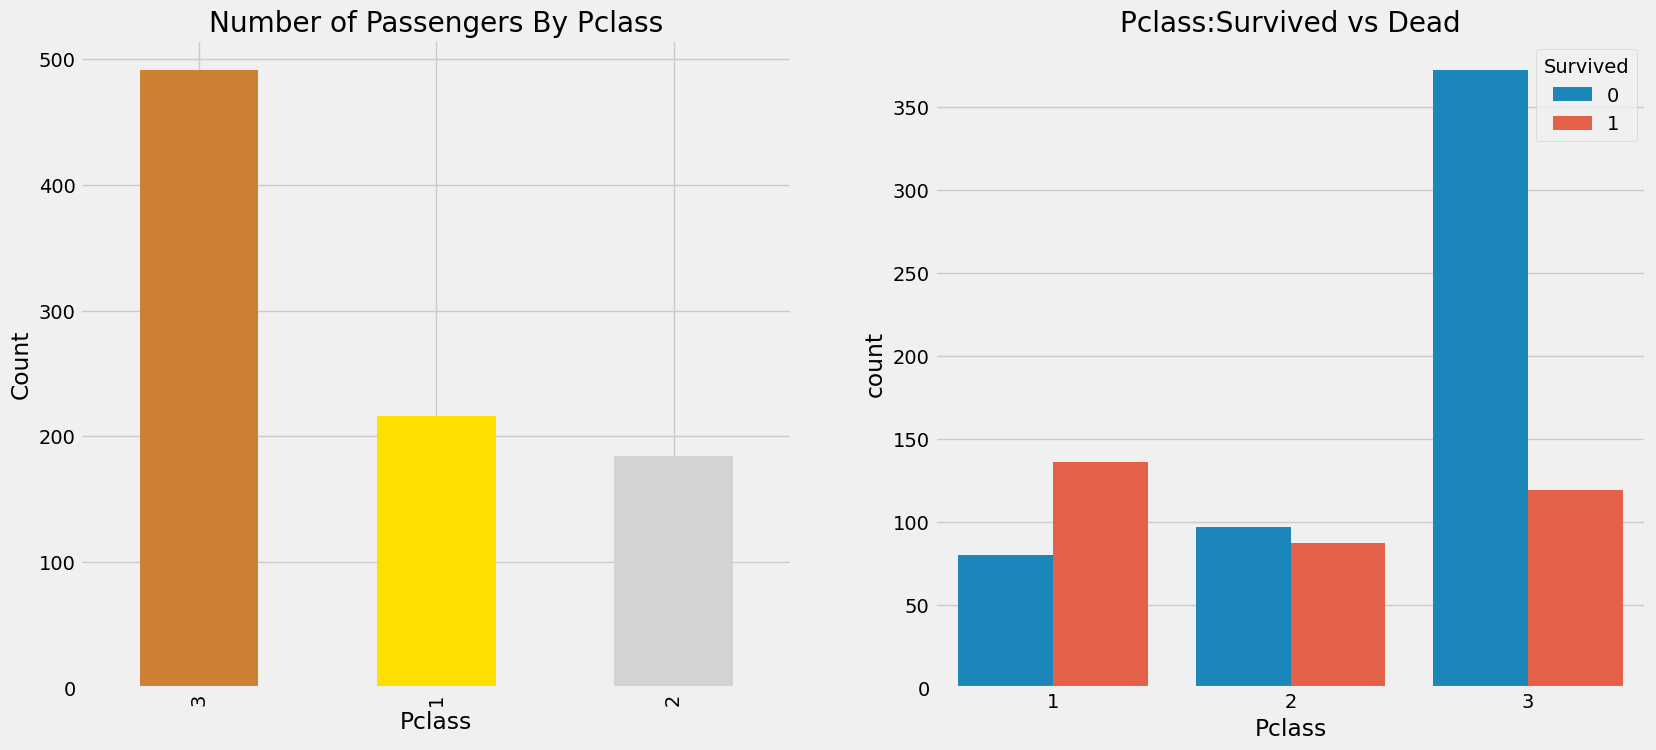

In [ ]:
f, ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

1Îì±Ïã§Ïùò ÏÉùÏ°¥Î•†Ïù¥ Îçî ÎÜíÎã§

ÏÑ±Î≥ÑÍ≥º PclassÎ•º Ìï®Íªò Ï≤¥ÌÅ¨Ìï¥Î≥¥Ïûê

In [ ]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

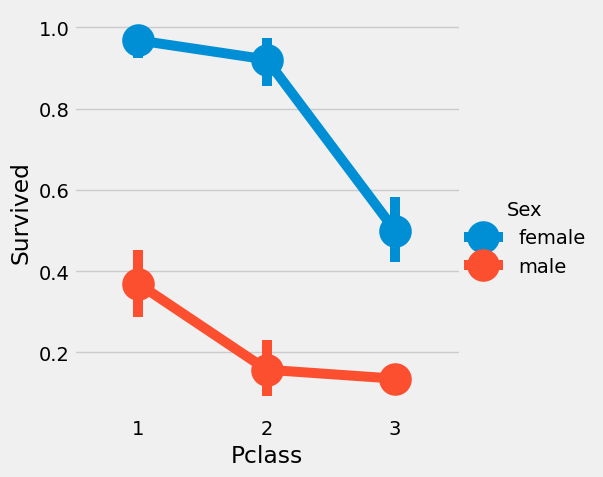

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data,kind='point')
plt.show()

1Îì±Ïã§ Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥Î•†Ïù¥ 95-96%Ïù¥Îã§
ÏÑ†Ïã§Îì±Í∏âÎèÑ Ï§ëÏöîÌïú ÌîºÏ≤òÏù¥Îã§

###Age--> Continuous Feature

In [ ]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


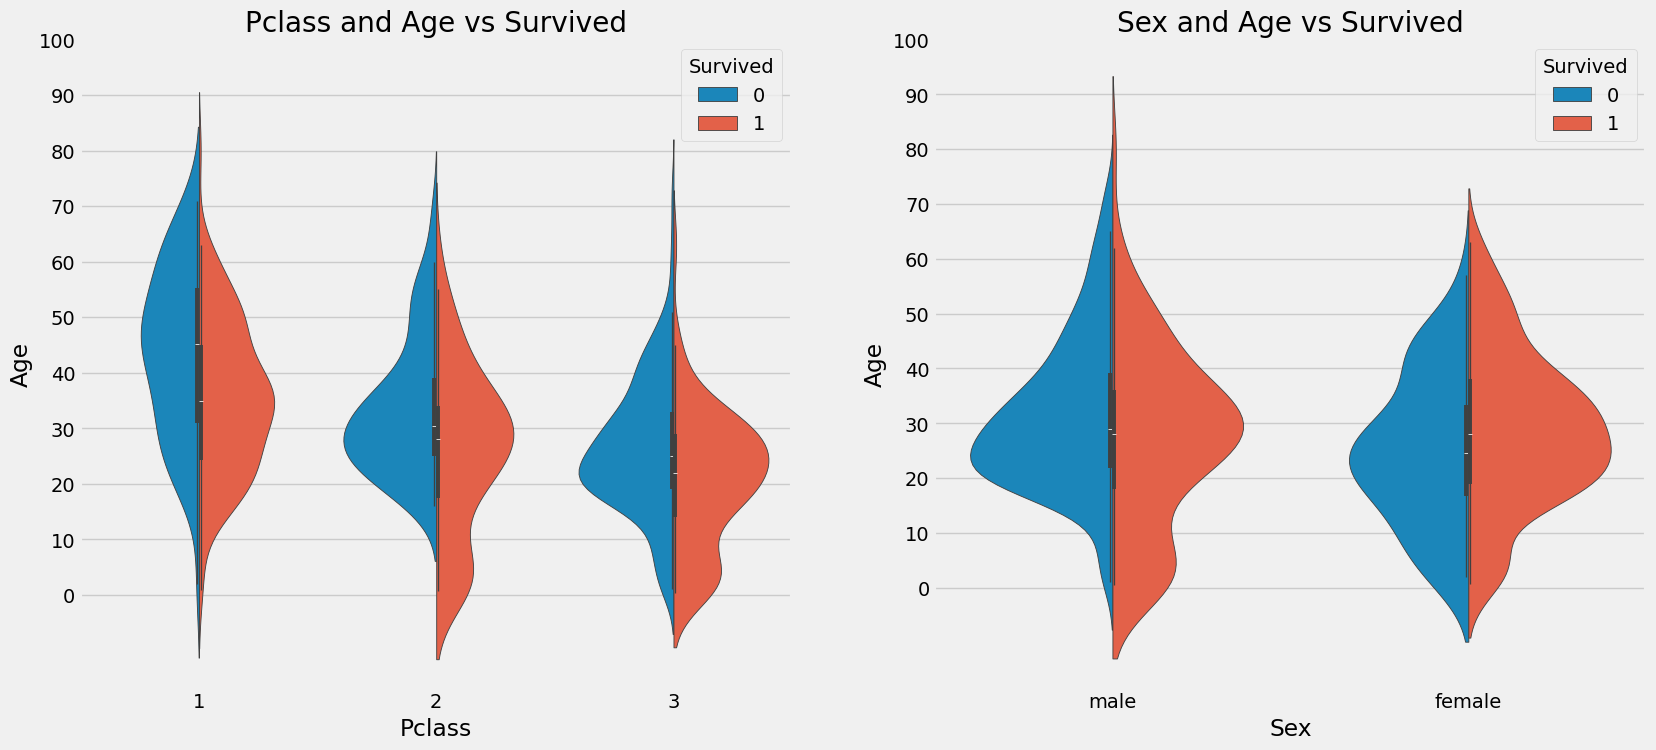

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x='Sex',y='Age',hue='Survived',data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Í¥ÄÏ∞∞
1. Ïñ¥Î¶∞Ïù¥ ÏàòÏôÄ Í∞ùÏã§ Îì±Í∏â: Ïñ¥Î¶∞Ïù¥Ïùò ÏàòÎäî Í∞ùÏã§ Îì±Í∏âÏù¥ ÎÇÆÏùÑÏàòÎ°ù ÎßéÏúºÎÇò 10ÏÑ∏ Ïù¥ÌïòÏùò ÏÉùÏ°¥Î•†ÏùÄ Í∞ùÏã§ Îì±Í∏âÏóê ÏÉÅÍ¥ÄÏóÜÏù¥ ÎÜíÎã§.

2. ÏÑ±Ïù∏Ïùò ÏÉùÏ°¥Î•†: ÏùºÎì±Ïã§ 20-50ÏÑ∏ ÏäπÍ∞ùÏùÄ ÏÉùÏ°¥ ÌôïÎ•†Ïù¥ ÎÜíÍ≥† ÌäπÌûà Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥Î•†Ïù¥ ÎçîÏö± ÎÜíÎã§

3. ÎÇ®ÏÑ±Ïùò ÏÉùÏ°¥Î•†Í≥º ÎÇòÏù¥Ïùò Í¥ÄÍ≥Ñ: ÎÇòÏù¥Í∞Ä ÎßéÏïÑÏßàÏàòÎ°ù ÏÉùÏ°¥ ÌôïÎ•† Í∞êÏÜå
>> Ïñ¥Îäê Ï†ïÎèÑ Ïù¥ÏÉÅ Ï¶ùÍ∞ÄÌïòÎ©¥ Îçî Ï¶ùÍ∞ÄÌïòÎäîÎîî...?


* ÎÇòÏù¥ Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Îäî Î∞©Î≤ï: ÌèâÍ∑†ÎÇòÏù¥Î°ú Ï±ÑÏö∞Í∏∞Ïóî ÏäπÍ∞ù ÎÇòÏù¥Í∞Ä Îß§Ïö∞ Îã§ÏñëÌï®>> Ïù¥Î¶ÑÏùò ÌäπÏßïÏùÑ Î∞îÌÉïÏúºÎ°ú Í∞Å Ìò∏Ïπ≠ Î≥Ñ ÌèâÍ∑† ÎÇòÏù¥ Í≥ÑÏÇ∞ÌïòÍ≥† Ï±ÑÏõåÎÑ£Í∏∞

In [4]:
data['Initial']=0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')# .Ïù¥ Îî∞ÎùºÏò§Îäî A-Z,a-z Ï∂îÏ∂ú



In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

In [5]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
 ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [6]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [ ]:
data.Age.isnull().any()#So no null values left finally

np.False_

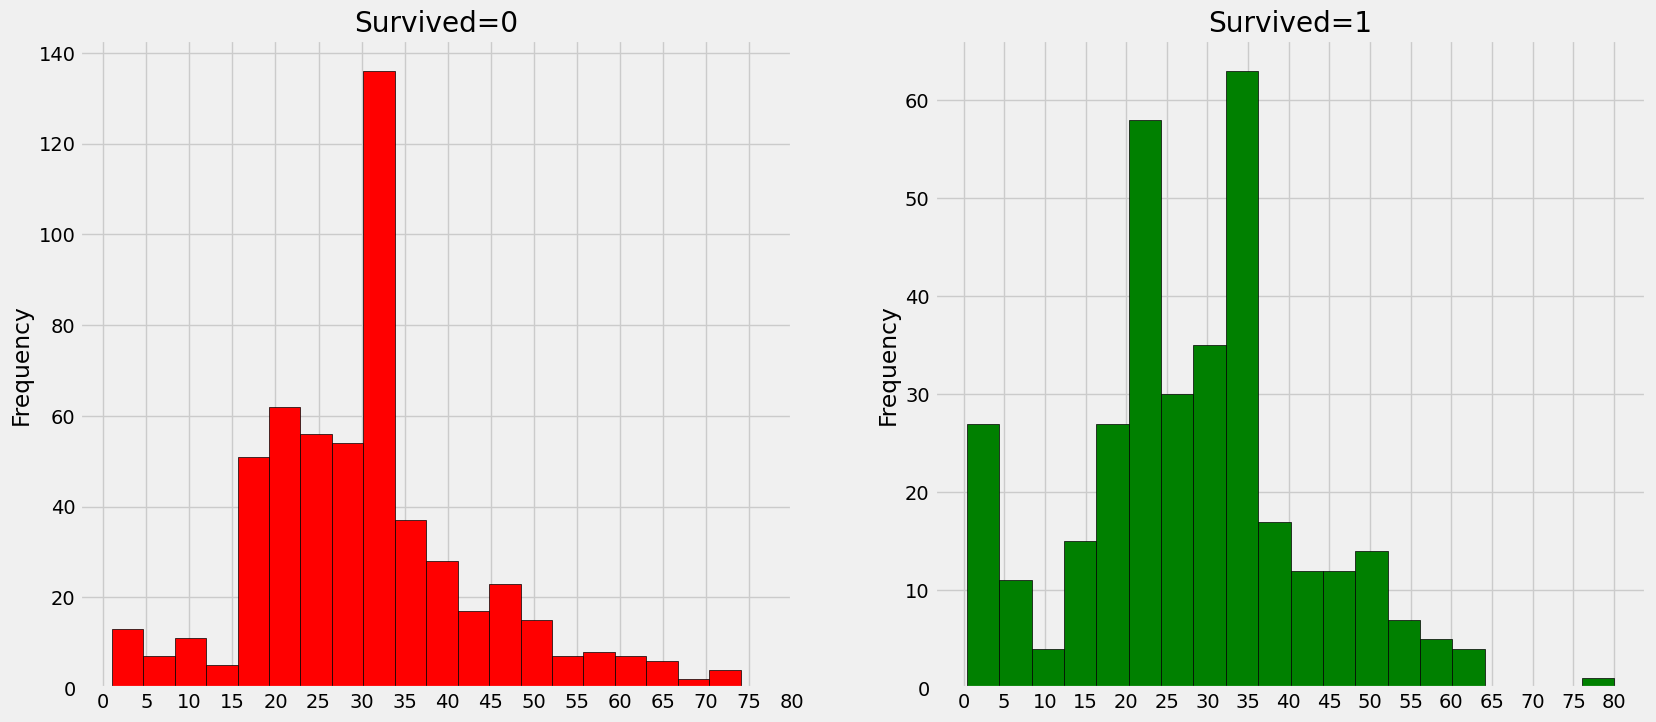

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Í¥ÄÏ∞∞
1. Ïã†ÏÉùÏïÑ(5ÏÑ∏ÎØ∏Îßå)ÏùÄ ÎåÄÎ∂ÄÎ∂Ñ ÏÉùÏ°¥
2. Í∞ÄÏû• ÎÇòÏù¥Í∞Ä ÎßéÏùÄ ÏäπÍ∞ù ÏÉùÏ°¥(80ÏÑ∏)
3. Í∞ÄÏû• ÎßéÏùÄ Ï£ΩÏùåÏùÄ 30-40ÏÑ∏ Í∑∏Î£πÏù¥Îã§.

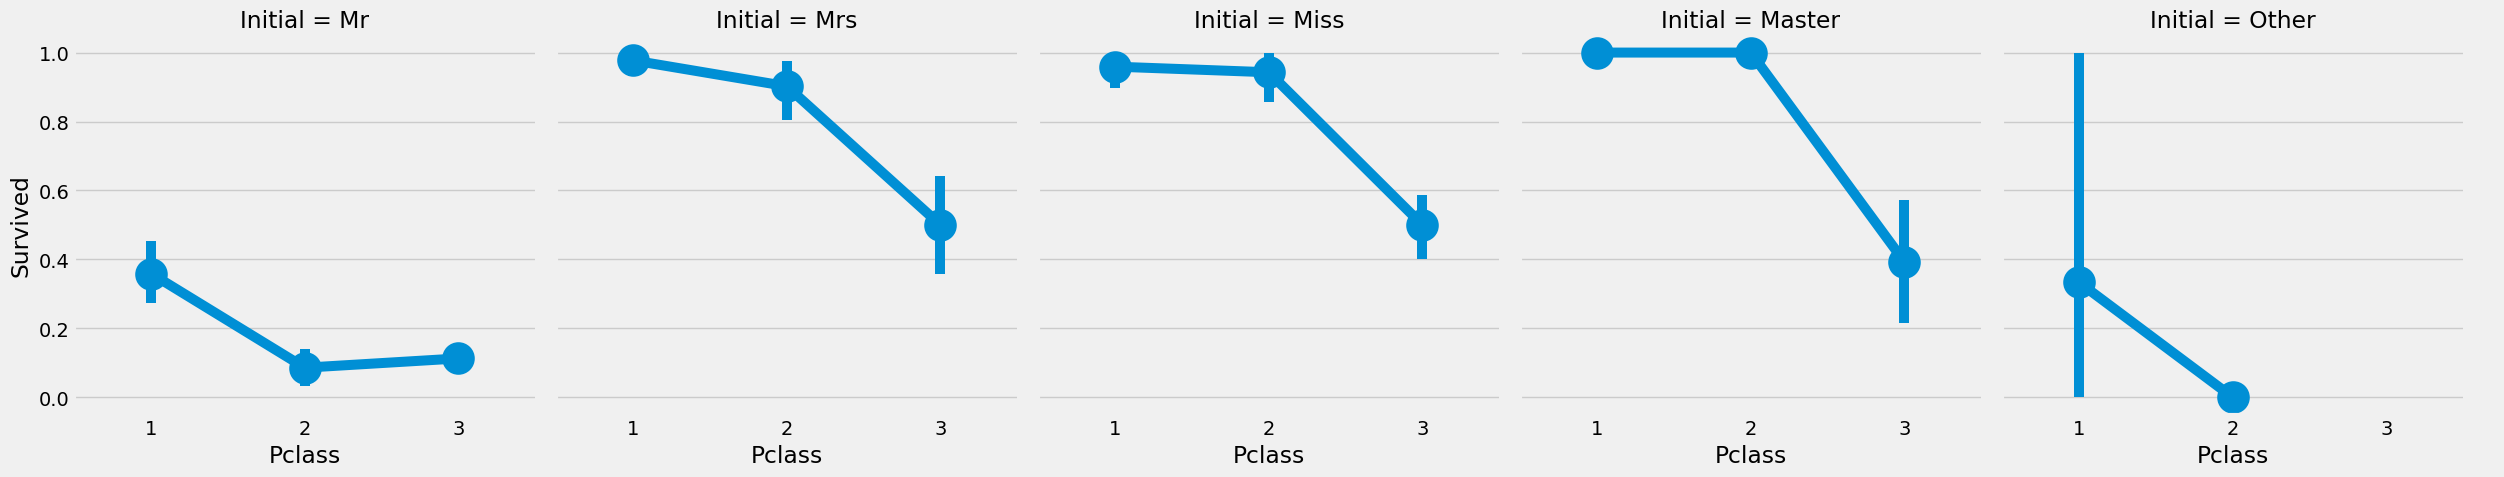

In [ ]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data,kind='point')

Ïó¨ÏÑ±Í≥º Ïñ¥Î¶∞Ïù¥ Ïö∞ÏÑ† Ï†ïÏ±ÖÏù¥ Í∞ùÏã§ Îì±Í∏âÏóê Í¥ÄÍ≥Ñ ÏóÜÏù¥ Ï†ÅÏö©ÎêòÏóàÎã§

###Embarked-->Categorical Value


In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

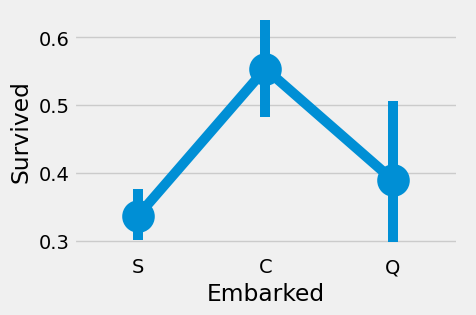

In [ ]:
sns.catplot(x='Embarked',y='Survived',data=data,kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

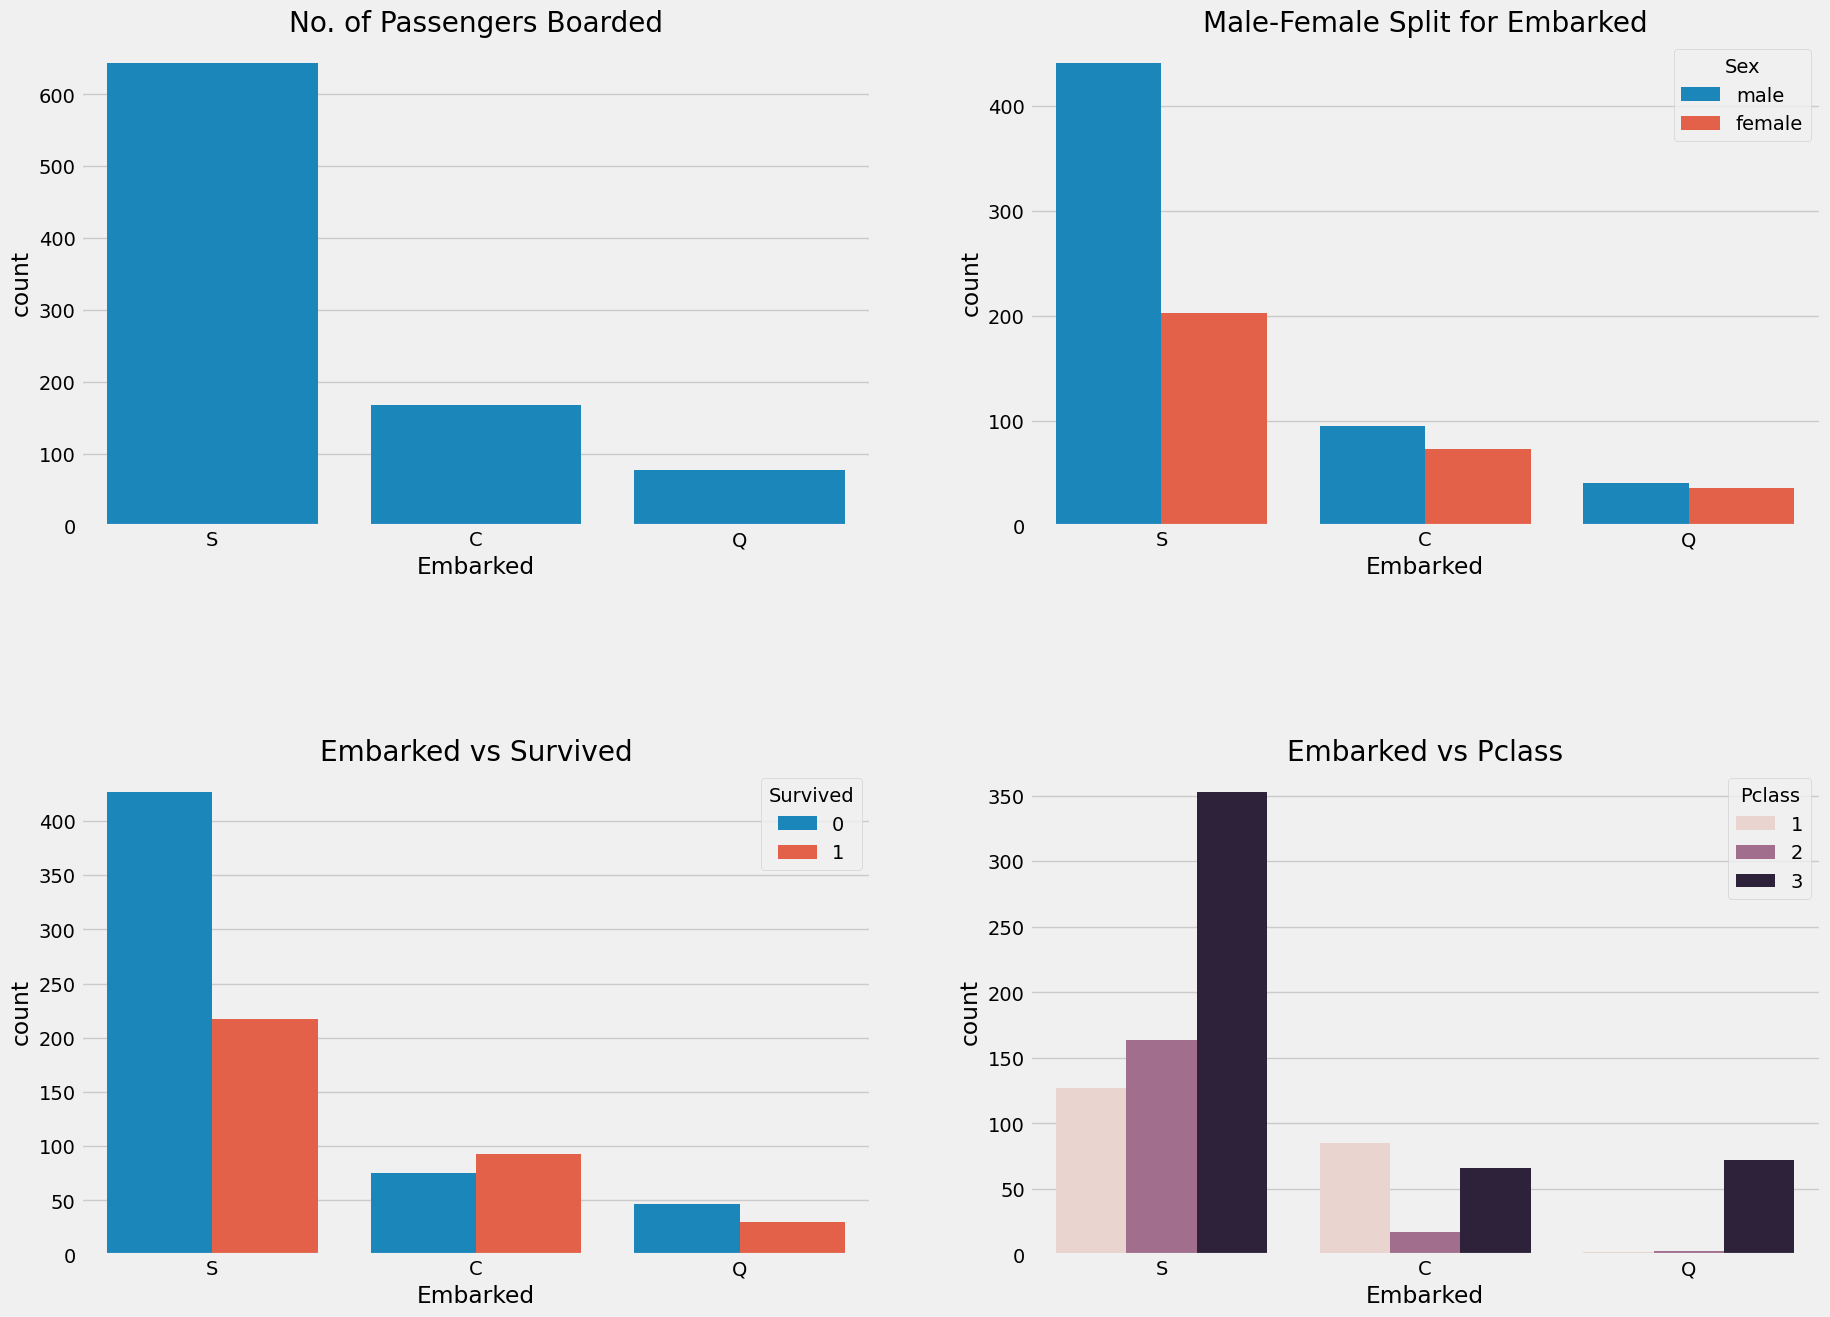

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Í¥ÄÏ∞∞
1. Í∞ÄÏû• ÎßéÏùÄ ÏäπÍ∞ùÏù¥ sÌï≠Íµ¨ÏóêÏÑú ÌÉëÏäπÌñàÏúºÎ©∞ ÎåÄÎ∂ÄÎ∂Ñ 3Îì±ÏÑù ÏäπÍ∞ùÏù¥ÏóàÎã§

2. cÏóêÏÑú ÌÉëÏäπÌïú ÏäπÍ∞ùÎì§ÏùÄ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏÉùÏ°¥ ÎπÑÏú®Ïù¥ ÎÜíÏïòÎäîÎç∞ Í∑∏ Ïù¥Ïú†Îäî1,2,Îì±ÏÑù ÏäπÍ∞ùÎì§Ïù¥ ÎåÄÎ∂ÄÎ∂Ñ Íµ¨Ï°∞ÎêòÏóàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.

3. sÎäî Î∂ÄÏú†Ìïú ÏäπÍ∞ùÎì§Ïù¥ ÎßéÏù¥ ÌÉëÏäπÌïú Ìï≠Íµ¨Ïù¥ÏßÄÎßå Ï†ÑÏ≤¥ ÏÉùÏ°¥Î•†Ïù¥ ÎÇÆÏïòÍ≥† Í∑∏ Ïù¥Ïú†Îäî 3Îì±ÏÑù ÏäπÍ∞ùÏùò 81%Ï†ïÎèÑ ÏÉùÏ°¥ÌïòÏßÄ Î™ªÌñàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§

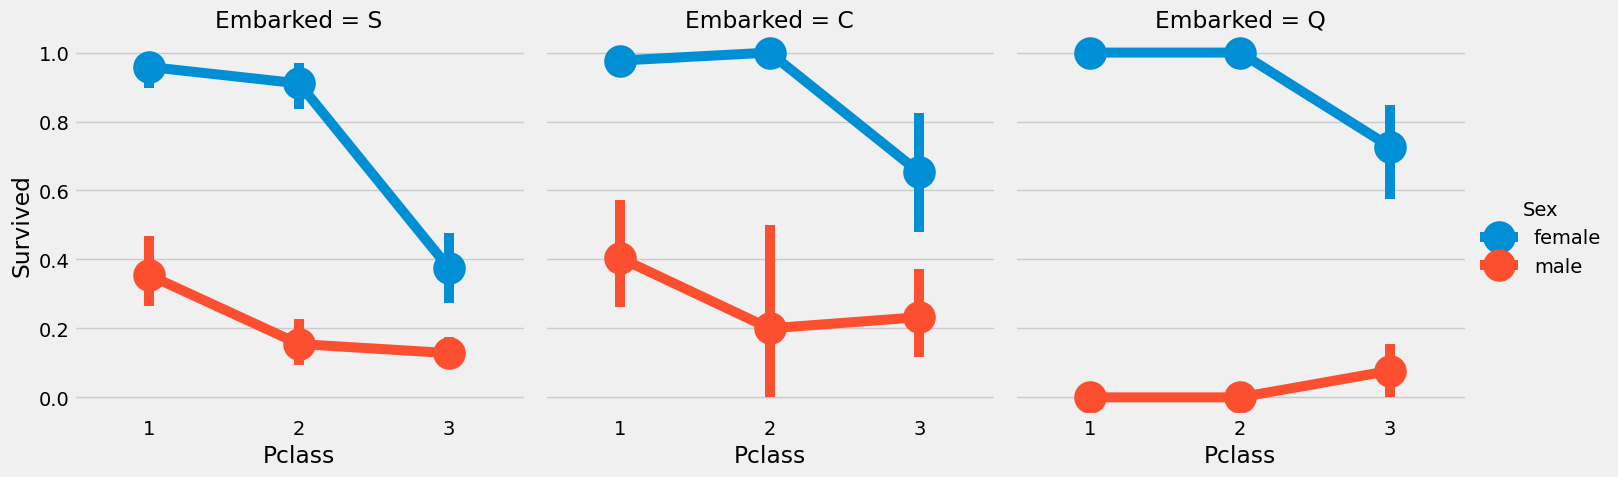

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data,kind='point')
plt.show()

Í¥ÄÏ∞∞
1.1,2Îì±Ïã§ Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥Í∏∞ÌöåÎäî Í±∞Ïùò 1Ïù¥Îã§
2. SÌï≠Íµ¨Îäî 3Îì±Ïã§ ÏäπÍ∞ùÏóêÍ≤å Îß§Ïö∞ Î∂àÌñâÏù¥Îã§. Ïó¨ÏÑ± ÎÇ®ÏÑ± Î™®ÎëêÏùò ÏÉùÏ°¥Î•†Ïù¥ Îß§Ïö∞ ÎÇÆÎã§
3. QÌï≠Íµ¨ÎäîÎåÄÎ∂ÄÎ∂Ñ 3Îì±Ïã§Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê ÎÇ®ÏÑ±ÏóêÍ≤å Í∞ÄÏû• Î∂àÌñâÌï¥Î≥¥Ïù∏Îã§

###Filling Embarked NaN
Í∞ÄÏû• ÎßéÏùÄ ÌÉëÏäπÌï≠Íµ¨Í∞Ä SÏù¥ÎØÄÎ°ú SÎ°ú Ï±ÑÏõå ÎÑ£ÎäîÎã§

In [7]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

np.False_

###SibSip--> Discrete Feature
ÌòºÏûêÏù¥Í±∞ÎÇò Í∞ÄÏ°± Íµ¨ÏÑ±ÏõêÏùÑ ÎÇòÌÉÄÎÇ∏Îã§  
Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [ ]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

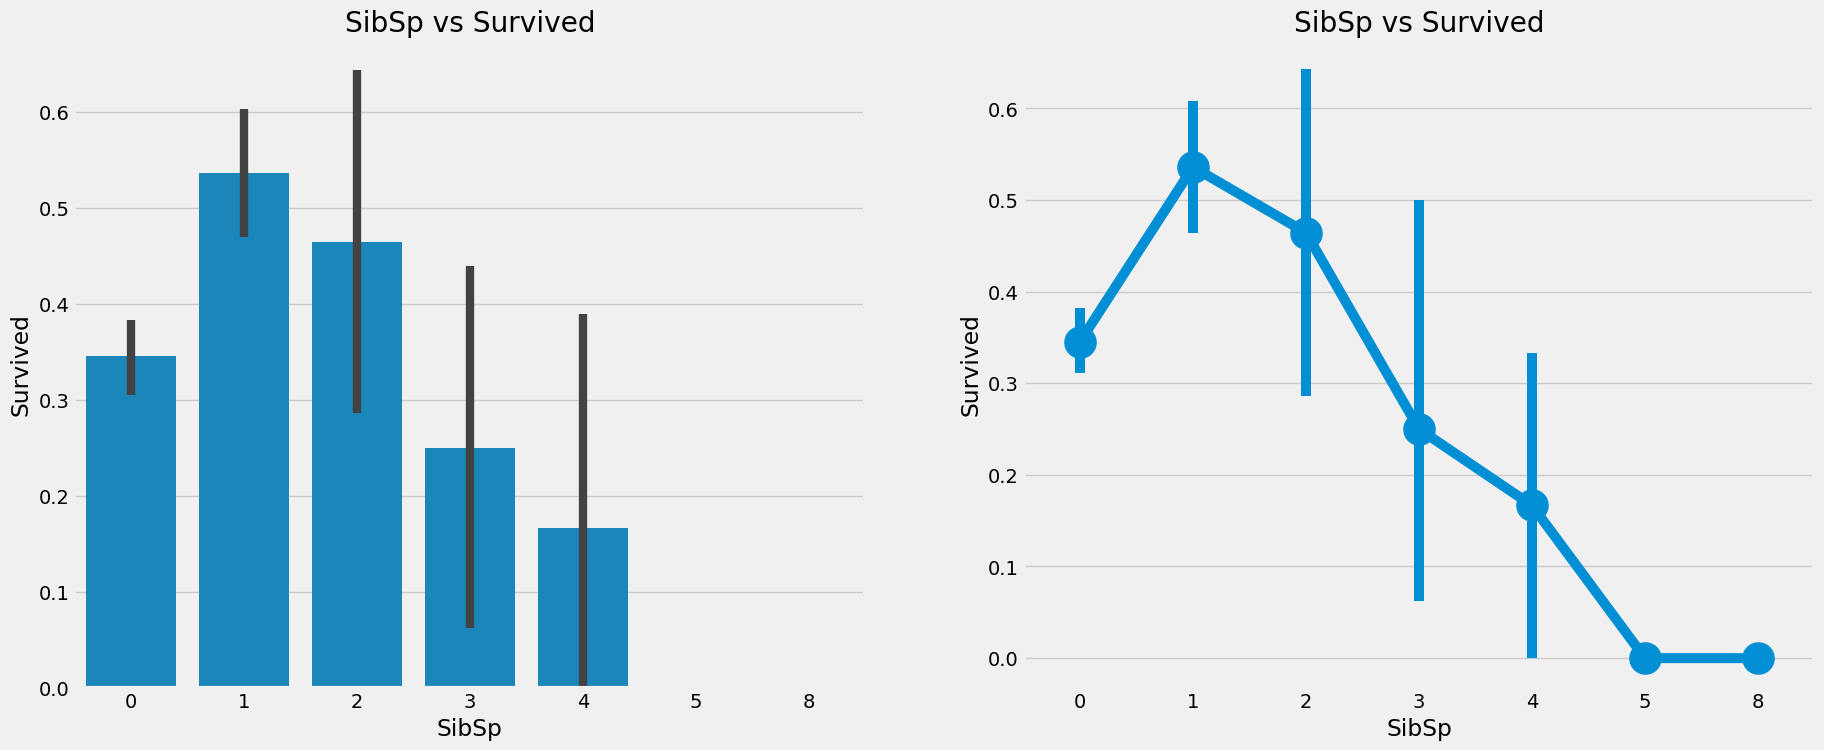

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x='SibSp',y='Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Í¥ÄÏ∞∞
1. Í∑∏ÎûòÌîÑ Í≤∞Í≥º: ÌòºÏûê ÌÉëÏäπÌïú ÏäπÍ∞ùÏùò ÏÉùÏ°¥Î•† ÏïΩ 34.5%, ÌòïÏ†úÏûêÎß§ÎÇò Î∞∞Ïö∞Ïûê ÏàòÍ∞Ä ÎßéÏïÑÏßàÏàòÎ°ù ÏÉùÏ°¥Î•† Í∞êÏÜå, ÏûêÏã†Î≥¥Îã§ Í∞ÄÏ°±ÏùÑ Î®ºÏ†Ä Íµ¨ÌïòÎ†§Îäî Í≤ΩÌñ•Ïù¥ ÏûàÏóàÍ∏∞ ÎïåÎ¨∏
2. Í∞ÄÏ°± Íµ¨ÏÑ±ÏõêÏù¥ 5-8Î™ÖÏù∏ Í≤ΩÏö∞ ÏÉùÏ°¥Î•† 0%> ÍµêÏ∞®ÌëúÎ°ú Î∂ÑÏÑùÌïú Í≤∞Í≥º Î™®Îëê 3Îì±ÏÑùÏúºÎ°ú 3Îì±ÏÑù ÎåÄÍ∞ÄÏ°±Ïù¥ Î™®Îëê ÏÇ¨Îßù> Í∞ùÏã§Îì±Í∏âÏù¥ ÏÉùÏ°¥ ÌôïÎ•†Ïóê ÌÅ∞ ÏòÅÌñ•


###Parch

In [ ]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

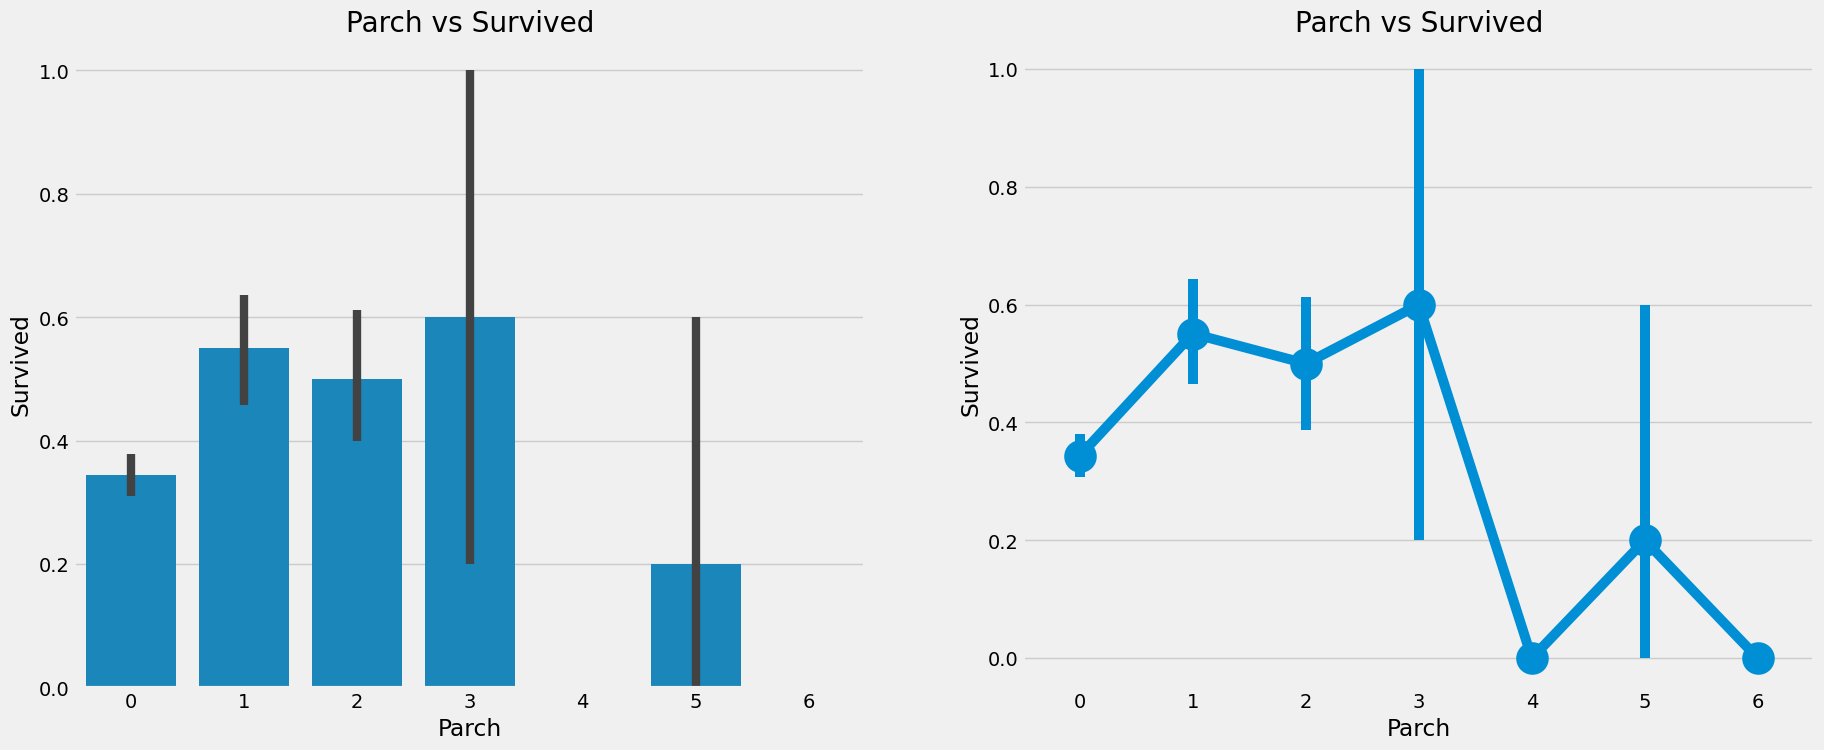

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

Í¥ÄÏ∞∞
1. SibSpÎ≥ÄÏàòÏôÄ Ïú†ÏÇ¨: Î∂ÄÎ™®ÎÇò ÏûêÎÖÄÍ∞Ä Ìï®Íªò ÌÉëÏäπÌïú ÏäπÍ∞ùÏùò ÏÉùÏ°¥ÌôïÎ•† Îçî ÎÜíÏùå
2. Í∑∏Îü¨ÎÇò ÎèôÎ∞ò Ïù∏ÏõêÏù¥ ÎßéÏïÑÏßàÏàòÎ°ù ÏÉùÏ°¥Î•† Í∞êÏÜå
1-3Î™ÖÏùò Î∂ÄÎ™®ÎÇò ÏûêÎÖÄÏôÄ Ìï®Íªò ÌÉëÏäπÌïú ÏäπÍ∞ùÏùò ÏÉùÏ°¥Î•†Ïù¥ Í∞ÄÏû• ÎÜíÏïòÎã§, ÌòºÏûê ÌÉëÏäπÌïú ÏäπÍ∞ùÏùò ÏÉùÏ°¥Î•†Ïù¥ ÎÇÆÍ≥†, 4Î™Ö Ïù¥ÏÉÅÍ≥º Ìï®ÍªòÌïú ÎåÄÍ∞ÄÏ°±Ïùò ÏÉùÏ°¥Î•†ÏùÄ Îß§Ïö∞ ÎÇÆÏïòÎã§

###Fare--> Countinous Feature


In [ ]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was: ',data['Fare'].mean())


Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was:  32.204207968574636


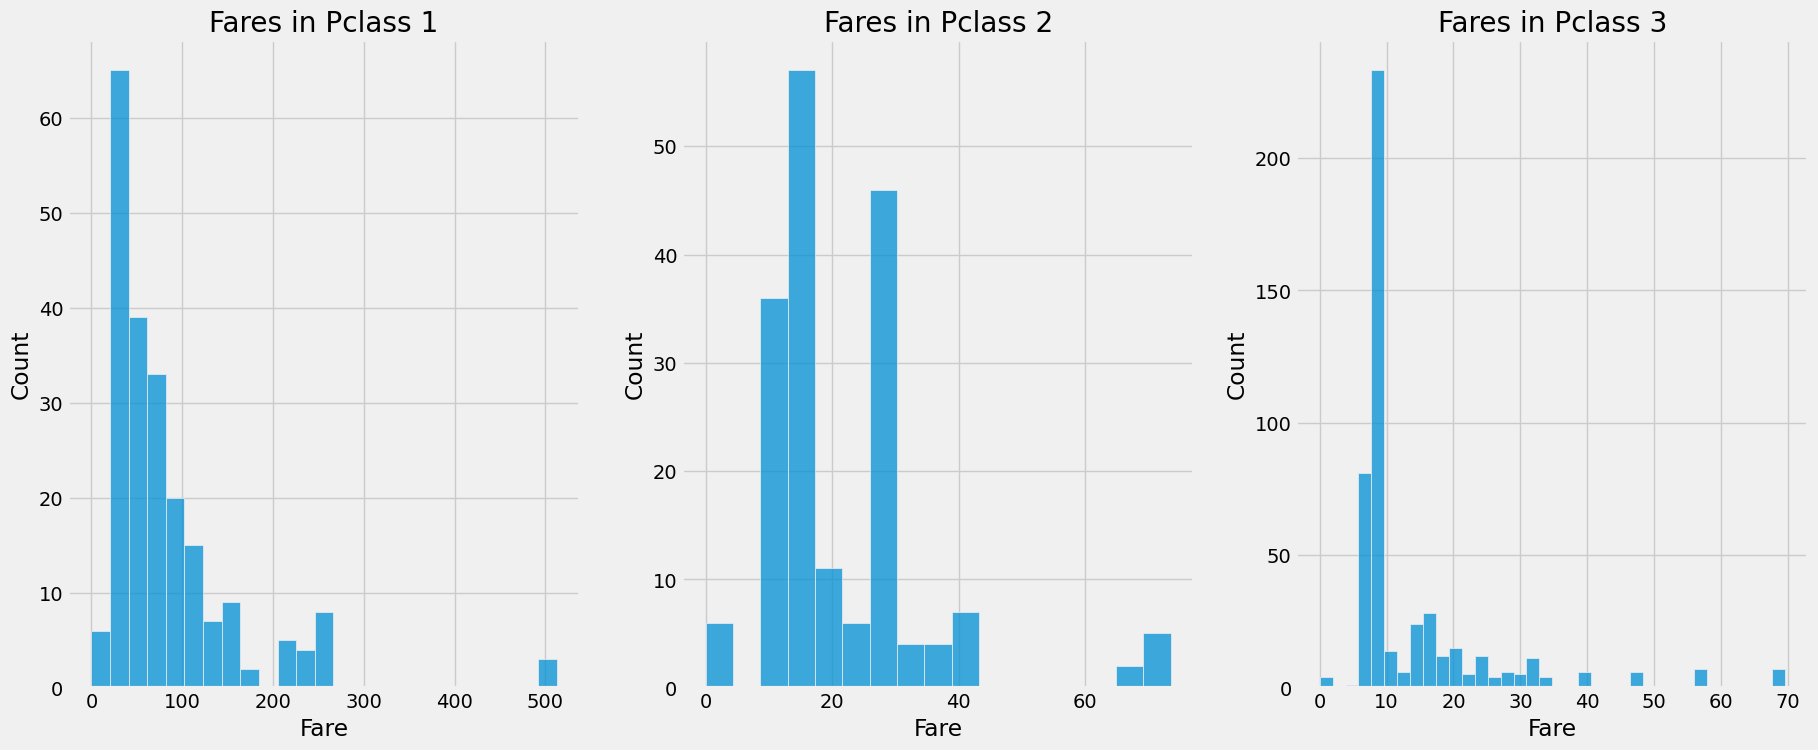

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.histplot(x=data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.histplot(x=data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.histplot(x=data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Í¥ÄÏ∞∞  
1Îì±ÏÑù ÏäπÍ∞ùÎì§Ïùò ÏöîÍ∏à Î∂ÑÌè¨Í∞Ä Îß§Ïö∞ ÎÑìÍ≤å ÌçºÏ†∏ ÏûàÏúºÎ©∞, Í∞ùÏã§ Îì±Í∏âÏù¥ ÎÇÆÏïÑÏßàÏàòÎ°ù Í∑∏ Î∂ÑÌè¨Í∞Ä Ï†êÏ†ê Ï§ÑÏñ¥ÎìúÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù∏Îã§. ÎòêÌïú, Ïù¥ Î≥ÄÏàòÎäî Ïó∞ÏÜçÌòïÏù¥ÎØÄÎ°ú Íµ¨Í∞ÑÌôî(binning)Î•º ÌÜµÌï¥ Ïù¥ÏÇ∞Ìòï Í∞íÏúºÎ°ú Î≥ÄÌôòÌï† Ïàò ÏûàÎã§.

###ÌîºÏ≤ò Ï¥ùÏ†ïÎ¶¨
* Ïó¨ÏÑ±Ïùò ÏÉùÏ°¥Î•†Ïù¥ ÎÇ®ÏÑ±Î≥¥Îã§ ÎÜíÏùå
* Í∞ùÏã§ Îì±Í∏â: 1Îì±Ïã§ Í∞ùÏã§Ïùò ÏÉùÏ°¥Î•† ÎÜíÍ≥†, 3Îì±Ïã§ Í∞ùÏã§Ïùò ÏÉùÏ°¥Î•† Îß§Ïö∞ ÎÇÆÏùå, Ïó¨ÏÑ±Ïùò Í≤ΩÏö∞ 1Îì±Ïã§ ÏÉùÏ°¥Î•† Í±∞Ïùò 1Ïù¥Í≥† 2Îì±Ïã§ÎèÑ ÎÜíÏùå, ÎèàÏù¥ Ï¢ãÎã§
* ÎÇòÏù¥: 5-10ÏÑ∏ ÏïÑÏù¥Ïùò ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÎã§, 15-35ÏÑ∏ ÏäπÍ∞ùÎì§Ïù¥ ÎßéÏù¥ ÏÇ¨Îßù
* ÌÉëÏäπÌï≠Íµ¨: CÌï≠Íµ¨ÏóêÏÑú ÌÉÑ ÏäπÍ∞ùÏùò ÏÉùÏ°¥Î•†Ïù¥ ÎÜíÏùå: sÎ≥¥Îã§ 1Îì±Ïã§ ÏäπÍ∞ùÏù¥ Ï†ÅÏùÑ ÏßÄÎùºÎèÑ, QÌï≠Íµ¨ÏóêÏÑú ÌÉëÏäπÌïú ÏÇ¨ÎûåÎì§ÏùÄ Í±∞Ïùò 3Îì±Ïã§
* Parch+ SibSp: 1-2 Í∞ÄÏ°± ÎòêÎäî 1-3 Î∂ÄÎ™®Î•º ÎëêÎ©¥ ÏÉùÏ°¥Î•†Ïù¥ Ïò¨ÎùºÍ∞ê, ÌòºÏûêÍ±∞ÎÇò ÎåÄÍ∞ÄÏ°±Ïùò ÏÉùÏ°¥Î•† ÎÇÆÏùå

### ÌîºÏ≤òÎì§Ïùò ÏÉÅÍ¥ÄÏÑ±

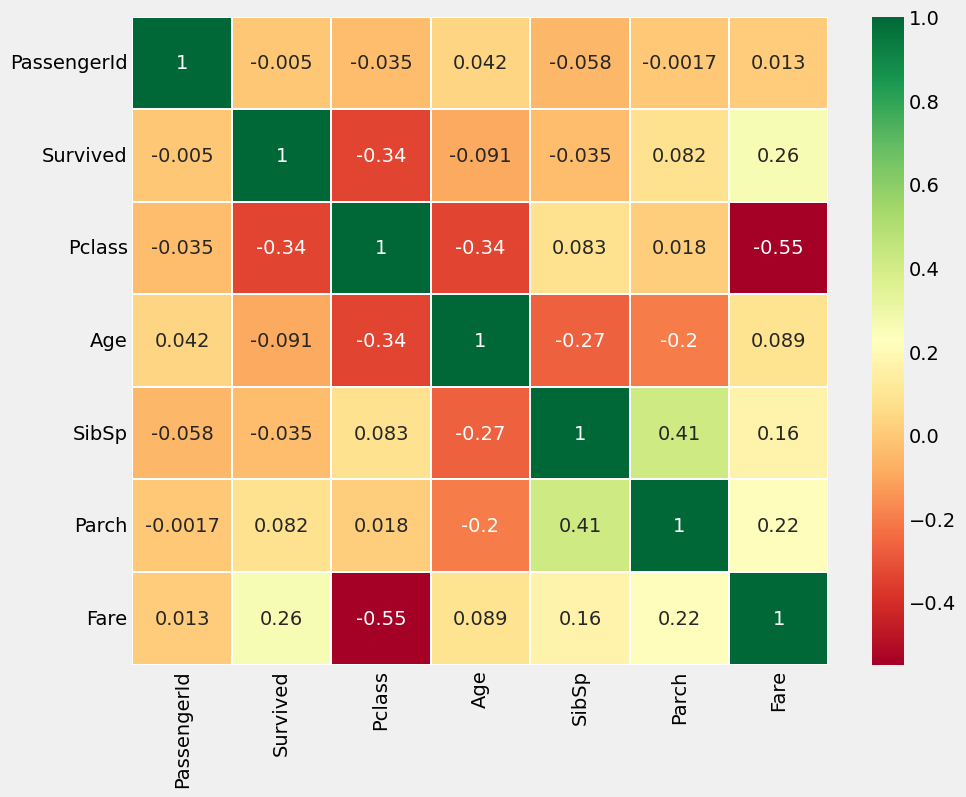

In [ ]:
cols = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
sns.heatmap(data[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

high positive: ÎëêÍ∞úÏùò ÌîºÏ≤òÍ∞Ä Îß§Ïö∞ Ïú†ÏÇ¨Ìïú Ï†ïÎ≥¥Î•º Îã¥Í≥† ÏûàÍ≥† Ï†ïÎ≥¥Ïóê Î∂ÑÏÇ∞Ïù¥ Í±∞Ïùò ÏóÜÎã§Îäî ÏùòÎØ∏/ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±(Ïó¨Îü¨ ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ ÏÇ¨Ïù¥Ïóê Í∞ïÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Ï°¥Ïû¨)
> ÎëòÏ§ë ÌïòÎÇòÎäî Î∂àÌïÑÏöîÌïòÎã§. Î∂àÌïÑÏöîÌïú ÌîºÏ≤òÎ•º Ï†úÍ±∞ÌïòÎ©¥ ÌïôÏäµÏãúÍ∞ÑÏùÑ Ï§ÑÏù¥Í≥† ÎßéÏùÄ Ïù¥ÎìùÏùÑ Ï§ÄÎã§.

> ÌûàÌä∏ÎßµÏóêÏÑú Ïö∞Î¶¨Îäî ÎßéÏùÄ ÌîºÏ≤òÎì§Ïù¥ ÏÉÅÍ¥ÄÎêòÏñ¥ÏûàÏßÄ ÏïäÏùÄ Í≤ÉÏùÑ Î≥º Ïàò ÏûàÎã§. Í∞ÄÏû• ÎÜíÏùÄ ÏÉÅÍ¥ÄÏÑ±ÏùÄ SibSpÍ≥º Parch ÏÇ¨Ïù¥Ïù∏ 0.41Ïù¥Îã§. Îî∞ÎùºÏÑú Ïö∞Î¶¨Îäî Î™®Îì† ÌîºÏ≤òÎ•º Í∞ÄÏ†∏Í∞à Ïàò ÏûàÎã§.

#Part 2: Feature Engineering and Data Cleaning

Ïù¥Ï†ú ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÏù¥ Î¨¥ÏóáÏù∏Í∞Ä?
Ïñ¥Îñ§ ÌîºÏ≤òÎì§Ïùò Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ï£ºÏñ¥Ï°åÍ±¥ Î™®Îì† ÌîºÏ≤òÍ∞Ä Î∞òÎìúÏãú Ï§ëÏöîÌïú Í≤ÉÏùÄ ÏïÑÎãàÎã§. ÎßéÏùÄ Î∂àÌïÑÏöîÌïú ÌîºÏ≤òÎì§Ïù¥ ÏûàÍ≥† Í∑∏ ÌîºÏ≤òÎì§ÏùÄ Ï†úÍ±∞ÎêòÏñ¥ÏïºÌïúÎã§. ÎòêÌïú Ïö∞Î¶¨Îäî Í¥ÄÏ∏°ÏúºÎ°úÎ∂ÄÌÑ∞ ÏÉàÎ°úÏö¥ ÌîºÏ≤òÎì§ÏùÑ ÏñªÍ±∞ÎÇò Îã§Î•∏ ÌîºÏ≤òÎ°úÎ∂ÄÌÑ∞ ÏÉàÎ°úÏö¥ Ï†ïÎ≥¥Î•º Ï∂îÏ∂úÌï† Ïàò ÏûàÎã§.

ÌïúÍ∞ÄÏßÄ ÏòàÏãúÍ∞Ä Ïù¥Î¶Ñ ÌîºÏ≤òÎ°úÎ∂ÄÌÑ∞ initial featureÎ•º ÏñªÎäî Í≤ÉÏù¥Îã§. ÏÉàÎ°úÏö¥ ÌîºÏ≤òÎ•º ÏñªÍ±∞ÎÇò Ï°∞Í∏à Ï†úÍ±∞Ìï† Ïàò ÏûàÎäîÏßÄ Î≥¥Ïûê. ÎòêÌïòÎäê Ïö∞Î¶¨Îäî Ï°¥Ïû¨ÌïòÎäî Í¥ÄÎ†® ÌîºÏ≤òÎì§ÏùÑ ÏòàÏ∏°Î™®Îç∏Ïóê Ï†ÅÌï©ÌïòÍ≤å Î≥ÄÌôòÌï† Ïàò ÏûàÎã§.

###Age_band

Ïó∞ÏÜçÍ∞íÏùÑ binningÏùÑ ÌÜµÌï¥ Ïπ¥ÌÖåÍ≥†Î¶¨Í∞íÏúºÎ°ú Î∞îÍæ∏Ïûê

80ÏÑ∏ÍπåÏßÄ ÏûàÏúºÎØÄÎ°ú 0-80ÏÑ∏Î•º 5Í∞úÎ°ú ÎÇòÎàÑÏûê(bins of size 16)

In [8]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>=64,'Age_band']=4
data.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked Initial  Age_band  
0      0  A/5 21171   7.2500   NaN        S      Mr         1  
1      0   PC 17599  71.2833   C85        C     Mrs         2

In [9]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

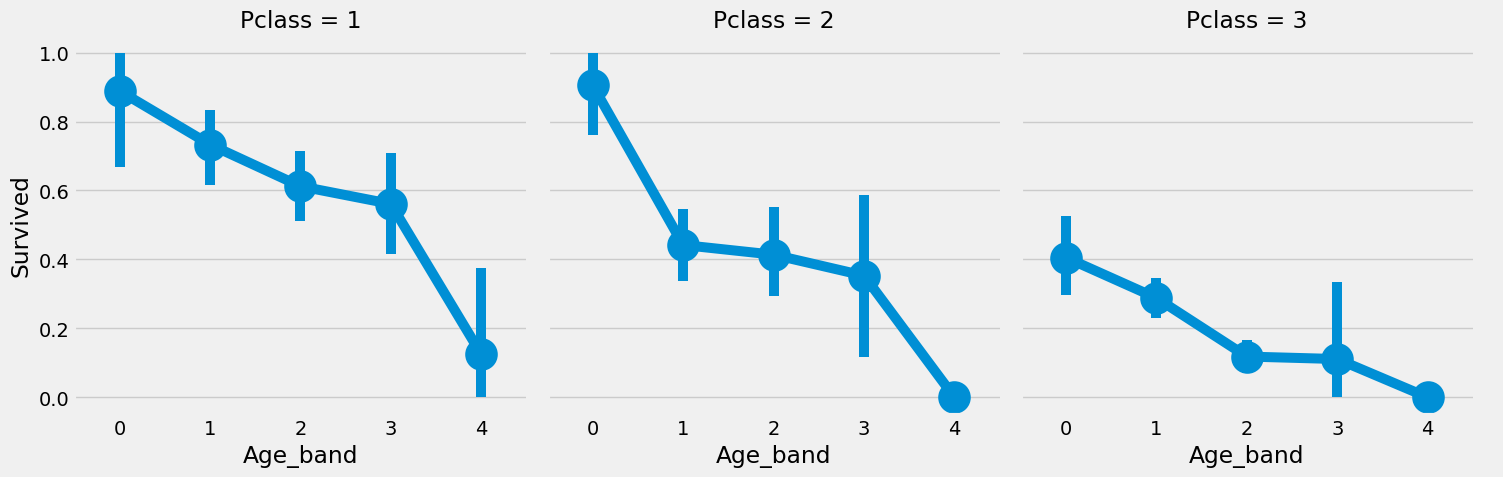

In [12]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass',kind='point')
plt.show()

ÎÇòÏù¥Í∞Ä ÎßéÏïÑÏßàÏàòÎ°ù ÏÉùÏ°¥Î•† Í∞êÏÜå, Í∞ùÏã§ Îì±Í∏âÏù¥ Ïò¨ÎùºÍ∞àÏàòÎ°ù ÏÉùÏ°¥Î•† Ï¶ùÍ∞Ä

###Family_Size and Alone

ÏÉàÎ°úÏö¥ ÌîºÏ≤ò ÏÉùÏÑ±: Family_Size, Alone by Parch+SibSp

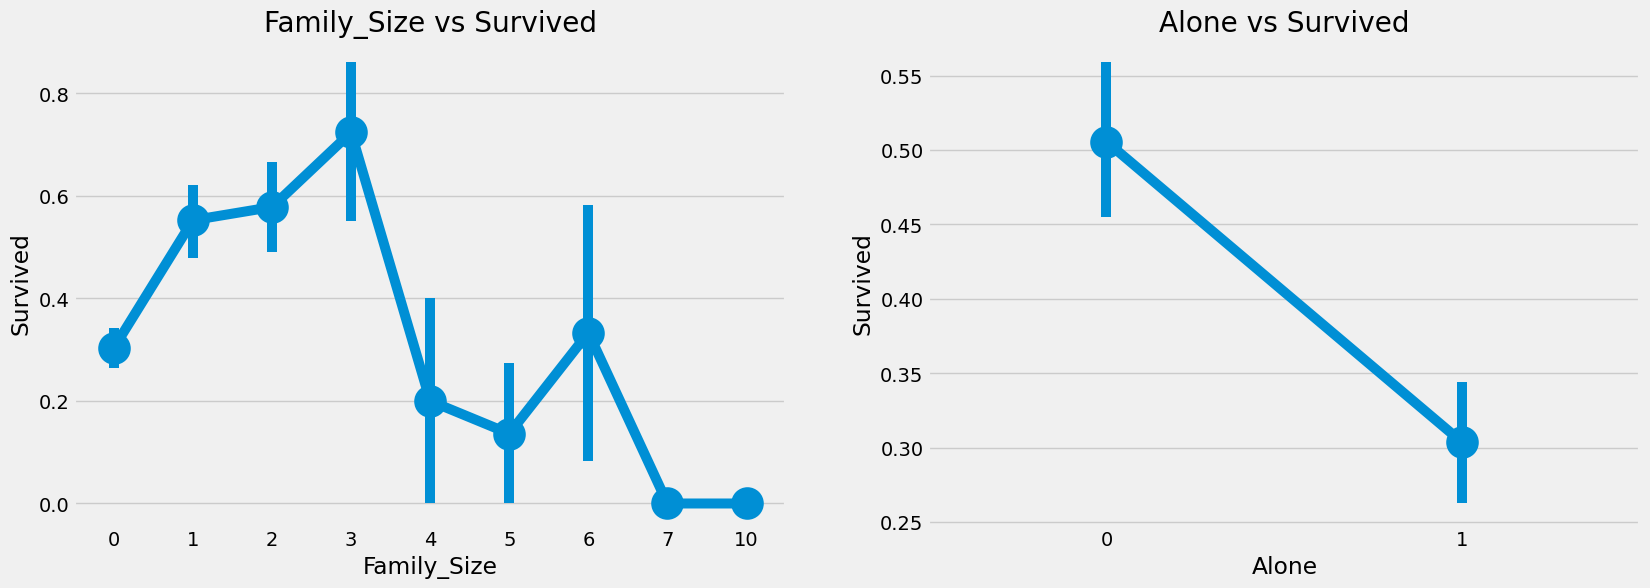

In [15]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#Family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size',y='Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

ÌòºÏûêÏûàÏùÑÏàòÎ°ù ÏÉùÏ°¥ÌôïÎ•† Îß§Ïö∞ ÎÇÆÏùå. 4Ïù∏ Ï¥àÍ≥ºÏùò Í∞ÄÏ°±ÎèÑ ÏÉùÏ°¥Í∏∞Ìöå Ï§ÑÏñ¥Îì¶. Ï§ëÏöîÌïú ÌîºÏ≤òÎ°ú Î≥¥ÏûÑ

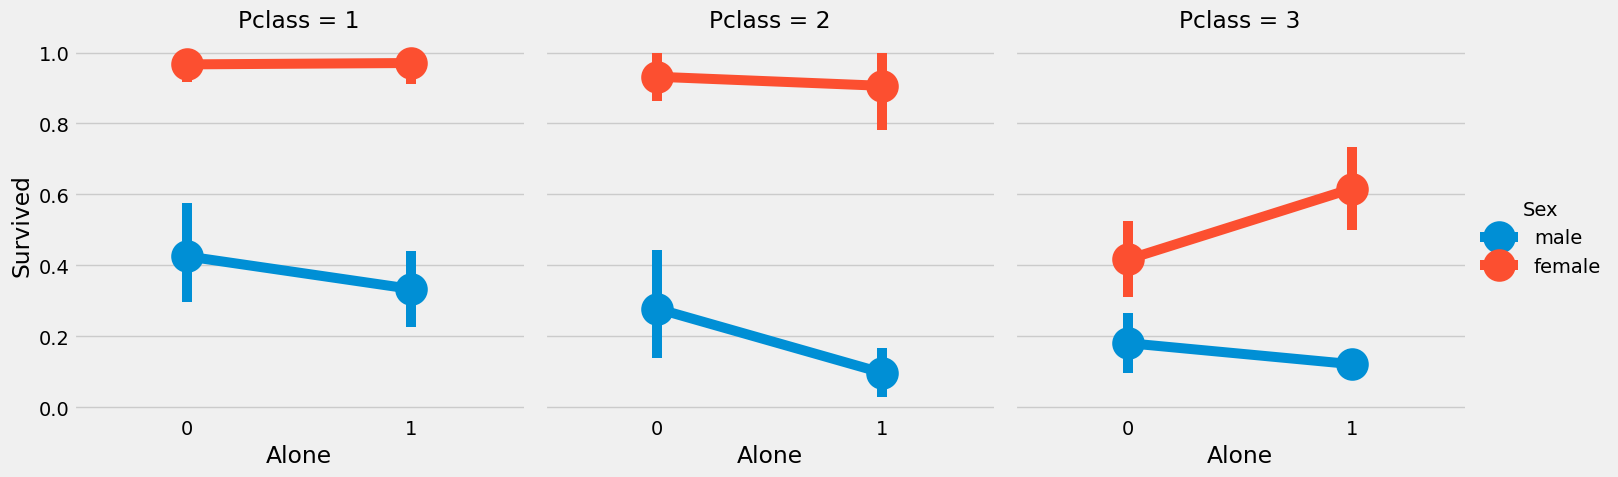

In [17]:
sns.catplot(x='Alone',y='Survived',data=data,hue='Sex',col='Pclass',kind='point')
plt.show()

3Îì±Ïã§ Ïó¨ÏÑ±ÏùÑ Ï†úÏô∏ÌïòÍ≥† ÌòºÏûêÏûàÏùÑÍ≤ΩÏö∞ ÏÉùÏ°¥Î•† ÎÇÆÏïÑÏßê

###Fare_Range
pandas.qcutÎ•º Ïù¥Ïö©Ìï¥ ÏöîÍ∏àÏùÑ ordinal valueÎ°ú Î∞îÍøà

bins ÏàòÎ•º Ïì∞Î©¥ ÎèôÏùºÌïòÍ≤å ÏûòÎùºÏ§å

In [18]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

ÏúÑÏóêÏÑú Ïù¥ÏïºÍ∏∞ÌñàÎìØÏù¥ ÏöîÍ∏à Î†àÏù∏ÏßÄÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÏÉùÏ°¥ Í∏∞ÌöåÍ∞Ä Ï¶ùÍ∞ÄÌï®
Îî∞ÎùºÏÑú ÎÇòÏù¥ Î∞¥ÎìúÏ≤òÎüº ÎßåÎì§Ïñ¥ÏïºÌï®

In [20]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31.0),'Fare_cat']=2
data.loc[(data['Fare']>31.0)&(data['Fare']<=513),'Fare_cat']=3

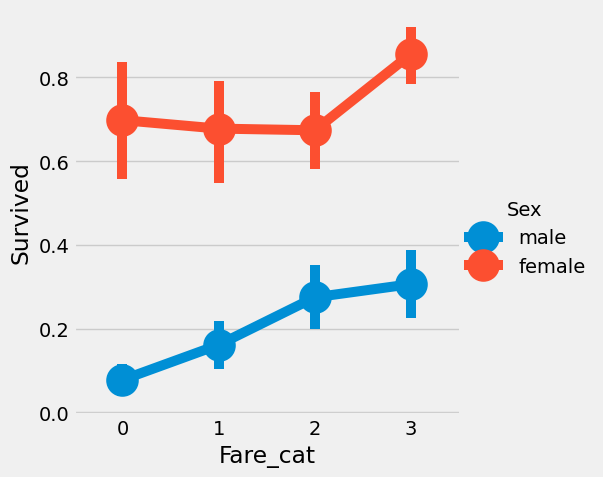

In [22]:
sns.catplot(x='Fare_cat',y='Survived',hue='Sex',data=data,kind='point')
plt.show()

Î™ÖÌôïÌïòÍ≤å ÏöîÍ∏à Ïπ¥ÌÖåÍ≥†Î¶¨Í∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÏÉùÏ°¥ Í∏∞ÌöåÍ∞Ä ÎÜíÏïÑÏßê. ÏÑ±Î≥ÑÏóê Îî∞Îùº Î™®Îç∏ÎßÅÌï†Îïå Ï§ëÏöîÌïú ÌîºÏ≤òÏù¥Îã§

##Converting String Value into Numeric

Ïö∞Î¶¨Îäî Î™®Îç∏Ïóê Ïä§Ìä∏ÎßÅÏùÑ ÎÑ£ÏùÑ Ïàò ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ïà´ÏûêÍ∞íÏúºÎ°ú Î≥ÄÌôòÌï¥ÏïºÌïúÎã§: Sex, Embarked Îì±

###Dropping UnNeeded Features

Name,Age(Age_bandÏûàÏúºÎØÄÎ°ú),Ticket,Fare(Fare_catÏûàÏúºÎØÄÎ°ú),Cabin,Fare_Range(Fare_catÏûàÏúºÎØÄÎ°ú),PassengerId

In [24]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

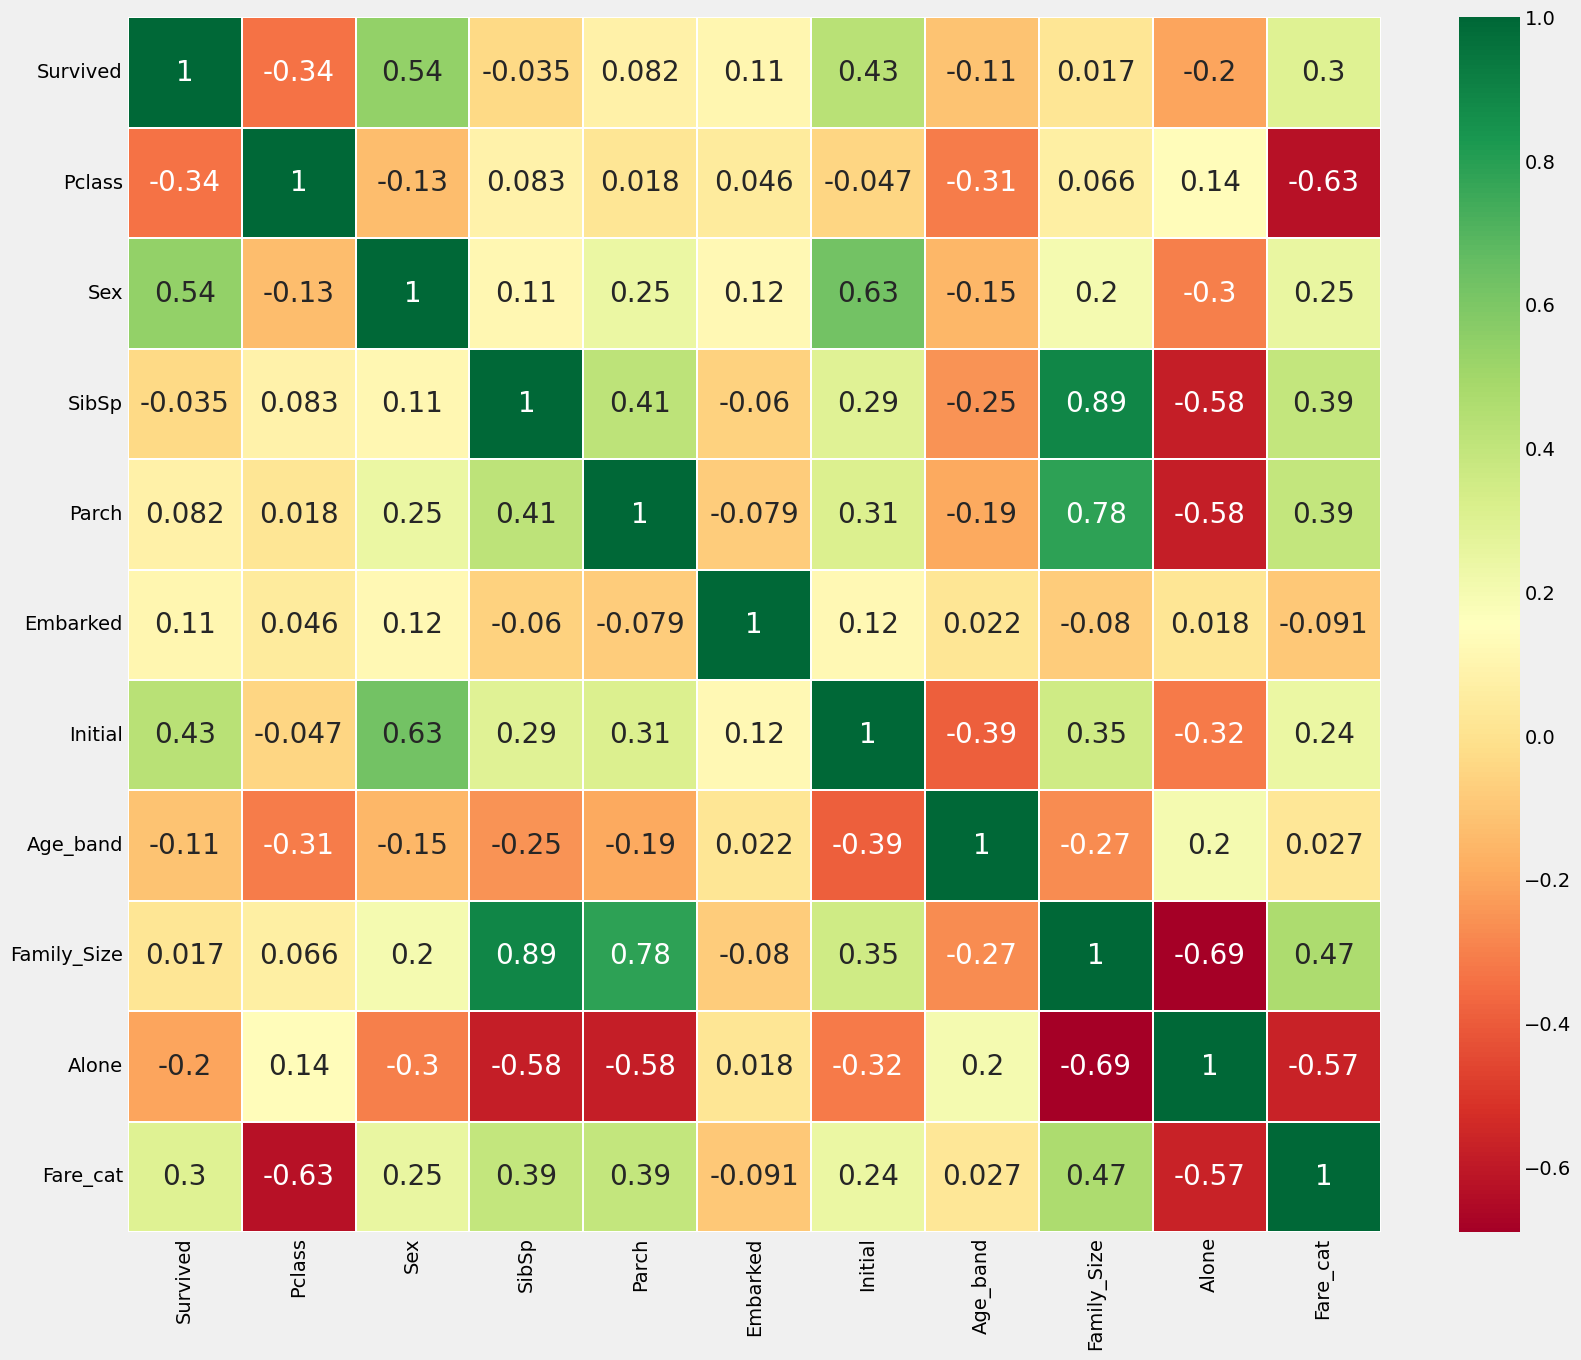

In [26]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Í∑∏Ï§ë ÏùºÎ∂ÄÎäî SibSpÏôÄ Family_Size, ParchÏôÄ Family_SizeÏ≤òÎüº ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(positive correlation) Î•º Í∞ÄÏßÄÎ©∞,
AloneÍ≥º Family_SizeÏ≤òÎüº ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ(negative correlation) Î•º Í∞ÄÏßÄÎäî Í≤ÉÎèÑ ÏûàÎã§.

#Part3: Predictive Modeling

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [32]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']


##Radial Support Vector Machines(rbf-SWM)

In [33]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is 0.835820895522388


##Linear Support Vector Machine(linear-SVM)

In [34]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is ',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is  0.8171641791044776


##Logistic Regression

In [35]:
model=LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('Accuracy for Logistic Regression is ', metrics.accuracy_score(prediction3,test_Y))

Accuracy for Logistic Regression is  0.8134328358208955


##Decision Tree

In [37]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('Accuracy for Decision Tree is ', metrics.accuracy_score(prediction4,test_Y))

Accuracy for Decision Tree is  0.8097014925373134


##K-Nearest Neighbors(KNN)

In [38]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('Accuracy of KNN is ', metrics.accuracy_score(prediction5,test_Y))

Accuracy of KNN is  0.8134328358208955


n_neighboursÎ•º Îã¨Î¶¨ÌïòÎ©∞ Ï†ïÌôïÎèÑ Î≥ÄÌôîÎ•º Î≥¥Í∏∞(ÎîîÌè¥Ìä∏:5)

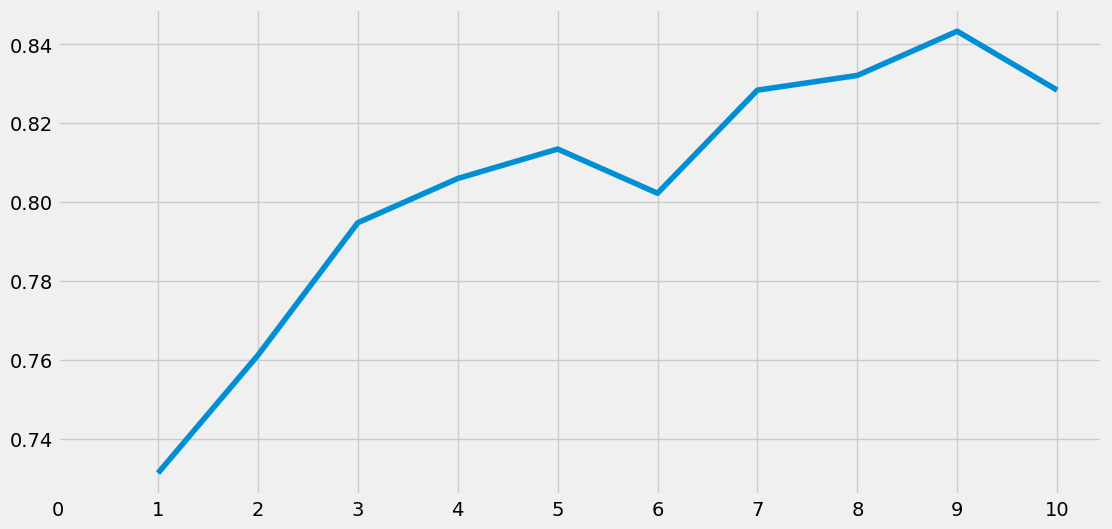

Accuracy for different values of n are:  [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84328358 0.82835821] with the max value as 0.8432835820895522


In [42]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X,train_Y)
  prediction=model.predict(test_X)
  a = pd.concat([a, pd.Series([metrics.accuracy_score(prediction, test_Y)])],
                 ignore_index=True)
plt.plot(a_index,a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracy for different values of n are: ',
      a.values,'with the max value as',a.values.max())

##Gaussian Naive Bayes

In [44]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('Accuracy of the NaiveBayes is ',metrics.accuracy_score(prediction6,test_Y))

Accuracy of the NaiveBayes is  0.8134328358208955


##Random Forests

In [45]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('Accuracy for Random Forest is ',metrics.accuracy_score(prediction7,test_Y))


Accuracy for Random Forest is  0.8208955223880597


Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ(accuracy)Îäî **Î∂ÑÎ•òÍ∏∞Ïùò Í≤¨Í≥†Ìï®(robustness)** ÏùÑ Í≤∞Ï†ïÌïòÎäî **Ïú†ÏùºÌïú ÏöîÏÜåÍ∞Ä ÏïÑÎãàÎã§.**

ÏòàÎ•º Îì§Ïñ¥, Ïñ¥Îñ§ Î∂ÑÎ•òÍ∏∞Í∞Ä ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞(training data)Î°ú ÌïôÏäµÎêòÍ≥†, ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test data)Î°ú Í≤ÄÏ¶ùÌñàÏùÑ Îïå **Ï†ïÌôïÎèÑ 90%**Î•º ÏñªÏóàÎã§Í≥† ÌïòÏûê.

Í≤âÎ≥¥Í∏∞ÏóêÎäî Îß§Ïö∞ ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ°ú Î≥¥Ïù¥ÏßÄÎßå,

> ÏÉàÎ°úÏö¥ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÎåÄÌï¥ÏÑúÎèÑ Ìï≠ÏÉÅ 90%Ïùò Ï†ïÌôïÎèÑÎ•º Î≥¥Ïû•Ìï† Ïàò ÏûàÏùÑÍπå?
> Í∑∏ ÎãµÏùÄ **‚ÄúÏïÑÎãàÏò§‚Äù** Ïù¥Îã§.

Í∑∏ Ïù¥Ïú†Îäî,
Î™®Îç∏Ïù¥ ÌïôÏäµÏóê ÏÇ¨Ïö©ÌïòÎäî Îç∞Ïù¥ÌÑ∞ Ïù∏Ïä§ÌÑ¥Ïä§Í∞Ä Îß§Î≤à Îã§Î•º Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.
Ï¶â, ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Îã¨ÎùºÏßà ÎïåÎßàÎã§ Ï†ïÌôïÎèÑ ÎòêÌïú **Ï¶ùÍ∞ÄÌïòÍ±∞ÎÇò Í∞êÏÜå**Ìï† Ïàò ÏûàÎã§.
Ïù¥Îü¨Ìïú ÌòÑÏÉÅÏùÑ **Î™®Îç∏ Î∂ÑÏÇ∞(Model Variance)** Ïù¥ÎùºÍ≥† ÌïúÎã§.

---

### ‚úÖ Ïù¥Î•º Ìï¥Í≤∞ÌïòÍ≥† ÏùºÎ∞òÌôîÎêú(generalized) Î™®Îç∏ÏùÑ ÏñªÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÏù¥ Î∞îÎ°ú **ÍµêÏ∞® Í≤ÄÏ¶ù(Cross Validation)** Ïù¥Îã§.

---

### üîπ Cross ValidationÏùò ÌïÑÏöîÏÑ±

Îç∞Ïù¥ÌÑ∞Í∞Ä **Î∂àÍ∑†Ìòï(imbalanced)** Ìï† Îïå ‚Äî
ÏòàÎ•º Îì§Ïñ¥, ÌÅ¥ÎûòÏä§ 1Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÍ≥† Îã§Î•∏ ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÏùÄ Í≤ΩÏö∞ ‚Äî
Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏ†ï Î∂ÄÎ∂ÑÏóêÎßå Ïûò ÏûëÎèôÌï† Ïàò ÏûàÎã§.
Îî∞ÎùºÏÑú Î™®Îç∏ÏùÑ **Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Î™®Îì† Ïù∏Ïä§ÌÑ¥Ïä§**Ïóê ÎåÄÌï¥ ÌïôÏäµÌïòÍ≥† ÌèâÍ∞ÄÌï¥Ïïº ÌïúÎã§.
Í∑∏ ÌõÑ Í∞Å Ïã§ÌóòÏùò Ï†ïÌôïÎèÑÎ•º ÌèâÍ∑†ÎÇ¥Ïñ¥ Ï†ÑÏ≤¥Ï†ÅÏù∏ ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïúÎã§.

---

### üîπ K-Fold Cross ValidationÏùò ÏûëÎèô Î∞©Ïãù

1Ô∏è‚É£ **Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ KÍ∞úÏùò ÌïòÏúÑ ÏßëÌï©(subset)** ÏúºÎ°ú ÎÇòÎààÎã§.

2Ô∏è‚É£ ÏòàÎ•º Îì§Ïñ¥ **K=5**ÎùºÎ©¥, Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ 5Í∞úÎ°ú ÎÇòÎàÑÍ≥†
Ïù¥ Ï§ë **1Í∞úÎ•º ÌÖåÏä§Ìä∏Ïö©**, ÎÇòÎ®∏ÏßÄ **4Í∞úÎ•º ÌïôÏäµÏö©**ÏúºÎ°ú ÏÇ¨Ïö©ÌïúÎã§.

3Ô∏è‚É£ Ïù¥ Í≥ºÏ†ïÏùÑ **ÌÖåÏä§Ìä∏Ïö© ÏßëÌï©ÏùÑ Î∞îÍøîÍ∞ÄÎ©∞ KÎ≤à Î∞òÎ≥µ**ÌïúÎã§.
Í∞Å Î∞òÎ≥µÏóêÏÑú Í≥ÑÏÇ∞Îêú **Ï†ïÌôïÎèÑ(accuracy)** ÏôÄ **Ïò§Ï∞®(error)** Î•º ÌèâÍ∑†ÎÇ¥Ïñ¥
ÏïåÍ≥†Î¶¨Ï¶òÏùò **ÌèâÍ∑† Ï†ïÌôïÎèÑ(average accuracy)** Î•º Íµ¨ÌïúÎã§.

Ïù¥ Î∞©Î≤ïÏùÑ **K-Fold Cross Validation** Ïù¥ÎùºÍ≥† ÌïúÎã§.

---

4Ô∏è‚É£ Ïñ¥Îñ§ ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÌäπÏ†ï ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî **Ïñ∏ÎçîÌîºÌåÖ(underfitting)**,
Îã§Î•∏ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî **Ïò§Î≤ÑÌîºÌåÖ(overfitting)** ÏùÑ ÏùºÏúºÌÇ¨ Ïàò ÏûàÎã§.
ÌïòÏßÄÎßå **ÍµêÏ∞® Í≤ÄÏ¶ù(Cross Validation)** ÏùÑ ÌÜµÌï¥
Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤¥Ïóê ÎåÄÌï¥ ÌïôÏäµ¬∑Í≤ÄÏ¶ùÏùÑ Î∞òÎ≥µÌï®ÏúºÎ°úÏç®
**Î≥¥Îã§ ÏùºÎ∞òÌôîÎêú(generalized) Î™®Îç∏**ÏùÑ ÏñªÏùÑ Ïàò ÏûàÎã§.


In [46]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits=10, shuffle=True, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression',
             'KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),
        RandomForestClassifier(n_estimators=100)]

for i in models:
  model=i
  cv_result=cross_val_score(model, X,Y,cv=kfold,scoring='accuracy')
  cv_result=cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)

In [47]:
new_models_dataframe2

CV Mean       Std
Linear Svm           0.784607  0.057841
Radial Svm           0.828377  0.057096
Logistic Regression  0.799176  0.040154
KNN                  0.807016  0.035763
Decision Tree        0.805868  0.048058
Naive Bayes          0.796966  0.056810
Random Forest        0.815993  0.045820

<Axes: >

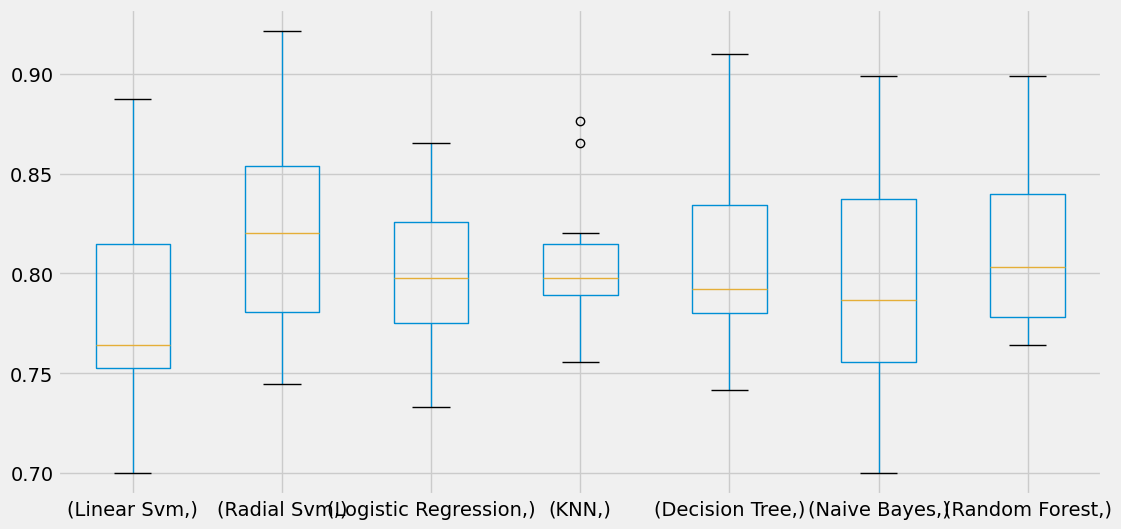

In [48]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

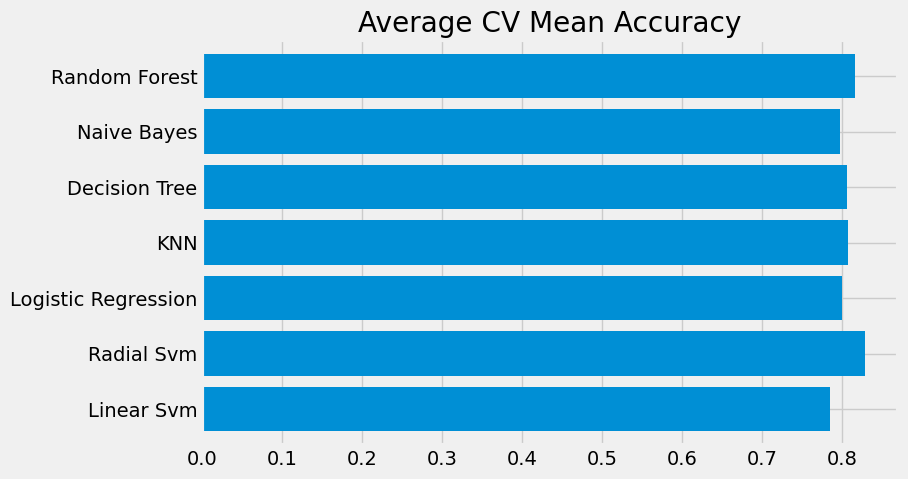

In [50]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

Ï†ïÌôïÎèÑÎäî Ï¢ÖÏ¢Ö misleadingÌïúÎã§ > confusion matrixÎ•º Î¥êÎ≥¥Ïûê

##Confusion Matrix

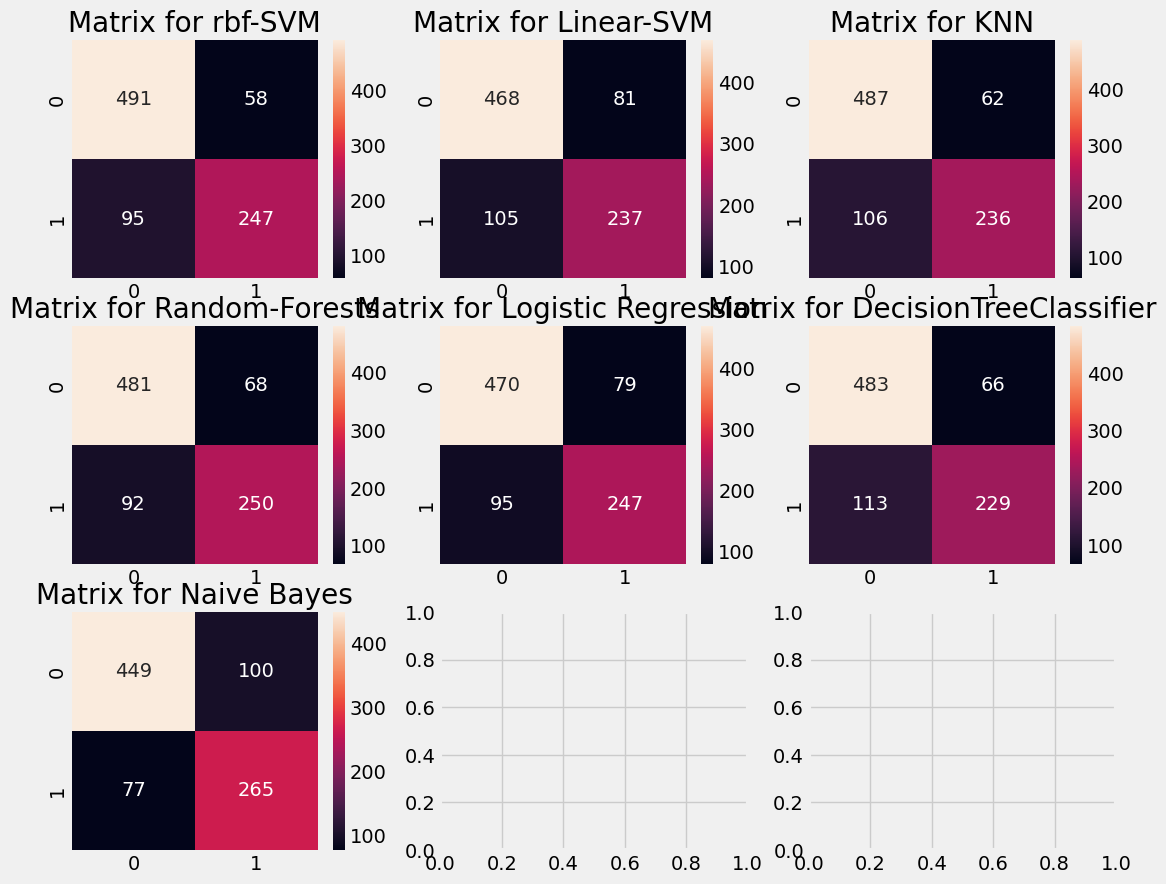

In [52]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred=cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred=cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred=cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred=cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred=cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred=cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for DecisionTreeClassifier')

y_pred=cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.show()

ÌòºÎèô ÌñâÎ†¨(Confusion Matrix) Ìï¥ÏÑù

ÏôºÏ™Ω ÎåÄÍ∞ÅÏÑ†ÏùÄ Í∞Å ÌÅ¥ÎûòÏä§ÏóêÏÑú Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°Îêú Í∞úÏàòÎ•º ÎÇòÌÉÄÎÇ¥Í≥†,
Ïò§Î•∏Ï™Ω ÎåÄÍ∞ÅÏÑ†ÏùÄ ÏûòÎ™ª ÏòàÏ∏°Îêú Í∞úÏàòÎ•º ÎÇòÌÉÄÎÇ∏Îã§.

ÏòàÎ•º Îì§Ïñ¥, rbf-SVMÏùò Ï≤´ Î≤àÏß∏ ÌòºÎèô ÌñâÎ†¨ÏùÑ Î≥¥Ïûê:

Ï†ïÌôïÌïòÍ≤å ÏòàÏ∏°Îêú Í∞úÏàòÎäî 491Î™Ö(ÏÇ¨ÎßùÏûê) + 247Î™Ö(ÏÉùÏ°¥Ïûê) Î°ú,
ÌèâÍ∑† ÍµêÏ∞® Í≤ÄÏ¶ù Ï†ïÌôïÎèÑÎäî (491 + 247) / 891 = **82.8%**Ïù¥Î©∞,
Ïù¥Îäî ÏïûÏÑú ÏñªÏùÄ Ï†ïÌôïÎèÑÏôÄ ÏùºÏπòÌïúÎã§.

Ïò§Î•ò ‚Üí ÏûòÎ™ª Î∂ÑÎ•òÎêú Í≤ΩÏö∞Îäî 58Î™ÖÏùò ÏÇ¨ÎßùÏûêÎ•º ÏÉùÏ°¥ÏûêÎ°ú,
95Î™ÖÏùò ÏÉùÏ°¥ÏûêÎ•º ÏÇ¨ÎßùÏûêÎ°ú ÏòàÏ∏°ÌñàÎã§.
Ï¶â, ÏÇ¨ÎßùÏûêÎ•º ÏÉùÏ°¥ÏûêÎ°ú ÏûòÎ™ª ÏòàÏ∏°Ìïú Í≤ΩÏö∞Í∞Ä Îçî ÎßéÎã§.

Î™®Îì† ÌòºÎèô ÌñâÎ†¨ÏùÑ ÎπÑÍµêÌï¥ Î≥¥Î©¥,
rbf-SVMÏùÄ ÏÇ¨ÎßùÏûêÎ•º Îçî Ï†ïÌôïÌûà ÏòàÏ∏°ÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÍ≥†,
Naive BayesÎäî ÏÉùÏ°¥ÏûêÎ•º Îçî Ï†ïÌôïÌûà ÏòàÏ∏°ÌïòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§.

##Hyper-Parameters Tuning

Í∞ÄÏû• ÏÑ±Îä•Ïù¥ Ï¢ãÏïòÎçò Îëê Î™®Îç∏ SVM, RandomForestÏùò ÌïòÏù¥Ìçº ÌååÎ¶¨ÎØ∏ÌÑ∞ ÌäúÎãù

In [53]:
from sklearn.model_selection import GridSearchCV
C=[0.05, 0.1, 0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


##Random Forests

In [54]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8204444165463561
RandomForestClassifier(n_estimators=700)


##Enssembling
1)Voting Classifier

2)Bagging

3)Boosting

###Voting Classifier

In [55]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))],
                                  voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is: ',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring='accuracy')
print('The cross valided score is ', cross.mean())

The accuracy for ensembled model is:  0.8171641791044776
The cross valided score is  0.8249188514357053


###Bagging

Bagged KNN

Î∞∞ÍπÖ(Bagging)ÏùÄ Î∂ÑÏÇ∞(variance) Ïù¥ ÌÅ∞ Î™®Îç∏ÏóêÏÑú Í∞ÄÏû• Ïûò ÏûëÎèôÌïúÎã§.
Ïù¥Îü∞ Î™®Îç∏Ïùò ÎåÄÌëúÏ†ÅÏù∏ ÏòàÎ°úÎäî ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥(Decision Tree) ÎÇò ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏(Random Forests) Í∞Ä ÏûàÎã§.

KNNÏùò Í≤ΩÏö∞ÏóêÎèÑ ÎπÑÏä∑ÌïòÍ≤å Ï†ÅÏö©Ìï† Ïàò ÏûàÎäîÎç∞,
n_neighbors Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Î™®Îç∏Ïùò Î∂ÑÏÇ∞Ïù¥ Ïª§ÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê,
ÏûëÏùÄ n_neighbors Í∞íÏùÑ ÏÇ¨Ïö©Ìï† Îïå Î∞∞ÍπÖ(Bagging) Ïù¥ Ìö®Í≥ºÏ†ÅÏù¥Îã§.

In [58]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                        n_estimators=50,random_state=0)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is: ',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is:  0.8208955223880597
The cross validated score for bagged KNN is: 0.8104369538077402


In [59]:
model=BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=100,random_state=0)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for Decision Tree is: ',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree is:',result.mean())

The accuracy for Decision Tree is:  0.8283582089552238
The cross validated score for Decision Tree is: 0.8182646691635455


###Boostion

1. AdaBoost

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is: ',result.mean())

The cross validated score for AdaBoost is:  0.8136828963795256


2. Stochastic Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is: ',result.mean())

The cross validated score for Gradient Boosting is:  0.8171535580524344


3. XGBoost

In [69]:
import xgboost as xg
xgb=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgb,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is: ',result.mean())

The cross validated score for XGBoost is:  0.8160174781523096


Ï∫êÍ∏ÄÏóêÏÑúÎäî 1Î≤àÏù¥ Í∞ÄÏû• ÎÜíÏùå
ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

In [64]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.4, n_estimators=800)


###Confusion Matrix for the best model

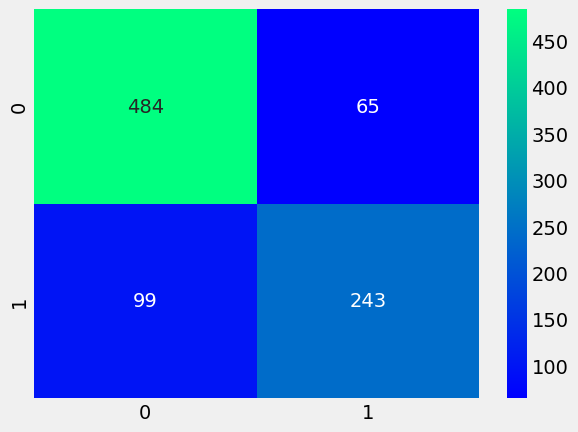

In [66]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

###Feature Importance

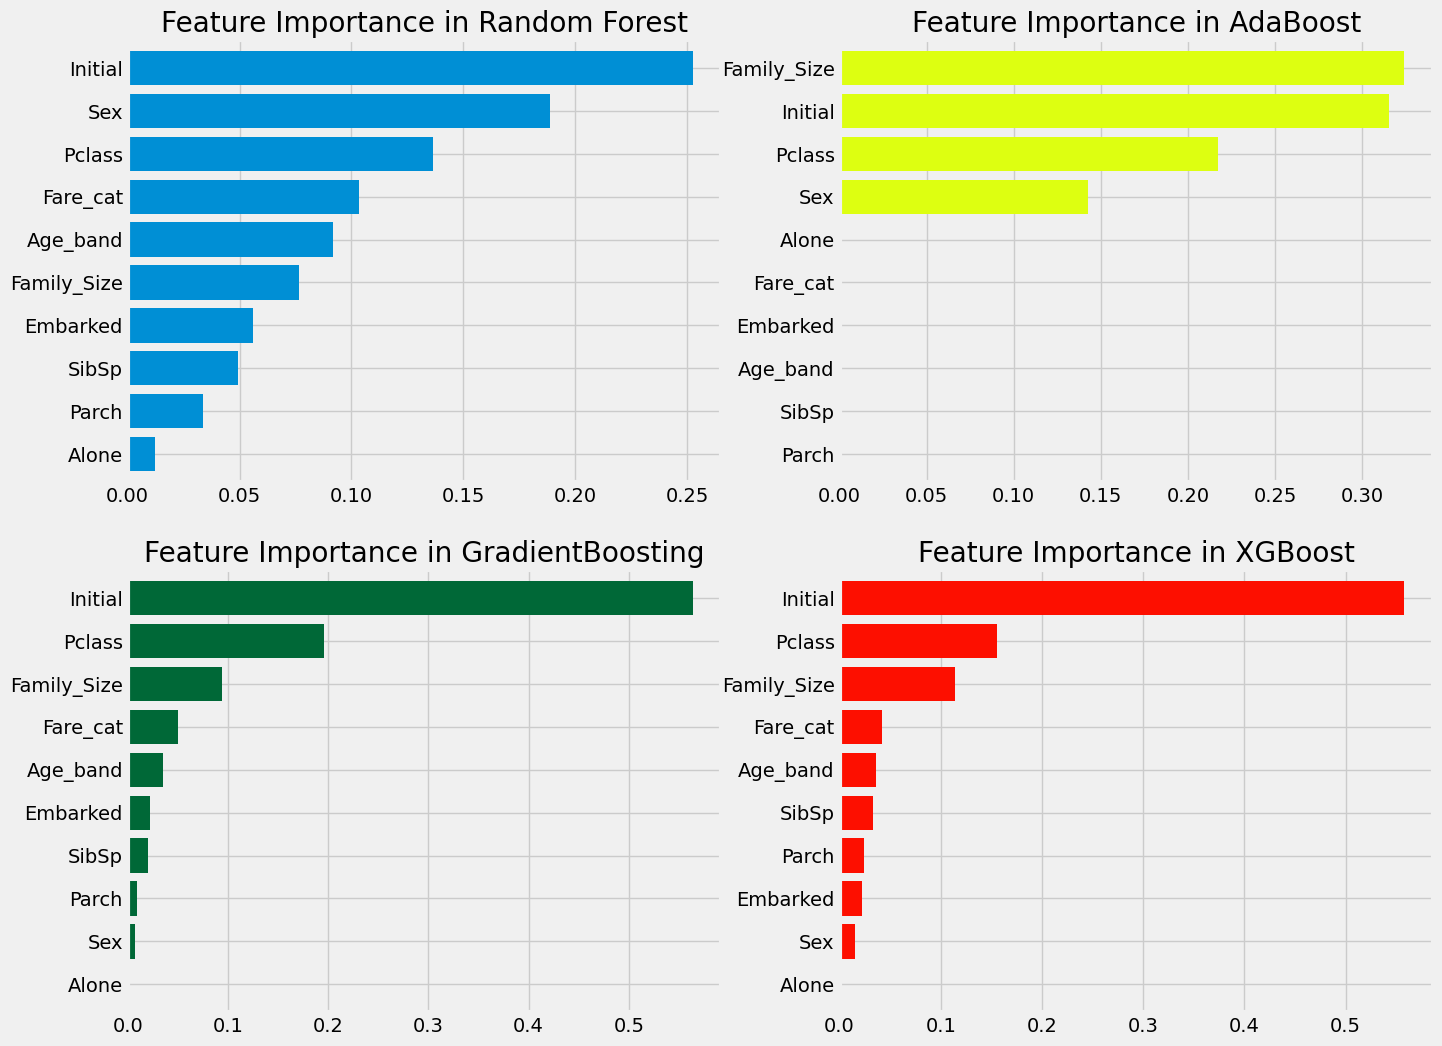

In [70]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forest')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11',ax=ax[0,1])
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,cmap='RdYlGn_r',ax=ax[1,0])
ax[1,0].set_title('Feature Importance in GradientBoosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FD0F00',ax=ax[1,1])
ax[1,1].set_title('Feature Importance in XGBoost')

plt.show()